In [1]:
# Parameters (overriden by papermill)
DATASET = 'long-linkers-enh'

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
sns.set_palette('Dark2')
sns.set_context('paper')
sns.set_style({'axes.axisbelow': True, 
               'axes.edgecolor': '.15',
               'axes.facecolor': 'white',
               'axes.grid': True, 
               'axes.labelcolor': '.15', 
               'figure.facecolor': 'white', 
               'grid.color': '.15',
               'grid.linestyle': ':', 
               'grid.alpha': .5, 
               'image.cmap': 'Greys', 
               'legend.frameon': False, 
               'legend.numpoints': 1, 
               'legend.scatterpoints': 1,
               'lines.solid_capstyle': 'butt', 
               'axes.spines.right': False, 
               'axes.spines.top': False,  
               'text.color': '.15',  
               'xtick.top': False, 
               'ytick.right': False, 
               'xtick.color': '.15',
               'xtick.direction': 'out', 
               'ytick.color': '.15', 
               'ytick.direction': 'out', 
              })


import matplotlib

FONT_SIZE_PT = 5
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = FONT_SIZE_PT
matplotlib.rcParams['axes.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['axes.titlesize'] = FONT_SIZE_PT
matplotlib.rcParams['figure.titlesize'] = FONT_SIZE_PT
matplotlib.rcParams['xtick.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['ytick.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['legend.fontsize'] = FONT_SIZE_PT
matplotlib.rcParams['legend.title_fontsize'] = FONT_SIZE_PT

matplotlib.rcParams['xtick.major.size'] = matplotlib.rcParams['ytick.major.size'] = 2
matplotlib.rcParams['xtick.major.width'] = matplotlib.rcParams['ytick.major.width'] = 0.5


matplotlib.rcParams['xtick.minor.size'] = matplotlib.rcParams['ytick.minor.size'] = 1

matplotlib.rcParams['xtick.minor.width'] = matplotlib.rcParams['ytick.minor.width'] = 0.5

matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['grid.linewidth'] = 0.25
matplotlib.rcParams['patch.linewidth'] = 0.25
matplotlib.rcParams['lines.markeredgewidth'] = 0.25
matplotlib.rcParams['lines.markersize'] = 2

FIVE_MM_IN_INCH = 0.19685
DPI = 600
matplotlib.rcParams['figure.figsize'] = (10 * FIVE_MM_IN_INCH, 9 * FIVE_MM_IN_INCH)
matplotlib.rcParams['savefig.dpi'] = DPI
matplotlib.rcParams['figure.dpi'] = DPI // 4


#http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# (03) Excel output

In [3]:
import pathlib

INPUT_MODEL_RESULTS = pathlib.Path('outputs') / '02-transformation-and-modelling' / DATASET / f'07-output-full_results.{DATASET}.csv'
assert INPUT_MODEL_RESULTS.is_file()

INPUT_METADATA = pathlib.Path('outputs') / '01-extracting' / f'data_metadata.{DATASET}.csv'
assert INPUT_METADATA.is_file()

INPUT_NUMERIC_DATA = pathlib.Path('outputs') / '01-extracting' / f'data_numeric.{DATASET}.csv'
assert INPUT_NUMERIC_DATA.is_file()

In [4]:
import pathlib
OUTPUT_DIRECTORY = pathlib.Path('outputs') / '03-excel-output' / DATASET

if not OUTPUT_DIRECTORY.is_dir():
    OUTPUT_DIRECTORY.mkdir(parents=True)

### Reading

In [5]:
data_metadata = pd.read_csv(INPUT_METADATA, index_col=0)
data_metadata

,# AAs,# PSMs,# Peptides,# Peptides (by Search Engine): Mascot,# Unique Peptides,Accession,Coverage [%],Description,Gene,MW [kDa],Score Mascot: Mascot
Label,,,,,,,,,,,
MYH9,1960,20013,170,170,137,P35579,71,Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...,MYH9,226.4,639499
SPTAN1,2472,11500,205,205,204,Q13813,79,"Spectrin alpha chain, non-erythrocytic 1 OS=Ho...",SPTAN1,284.4,391743
PRKDC,4128,12445,246,246,246,P78527,64,DNA-dependent protein kinase catalytic subunit...,PRKDC,468.8,377897
ACTB,375,10826,30,30,13,P60709,82,"Actin, cytoplasmic 1 OS=Homo sapiens OX=9606 G...",ACTB,41.7,369811
SPTBN1,2364,10348,180,180,166,Q01082,79,"Spectrin beta chain, non-erythrocytic 1 OS=Hom...",SPTBN1,274.4,350270
...,...,...,...,...,...,...,...,...,...,...,...
NFKBIL1,381,3,2,2,2,Q9UBC1,7,NF-kappa-B inhibitor-like protein 1 OS=Homo sa...,NFKBIL1,43.2,22
NOS1AP,506,3,2,2,2,O75052,5,Carboxyl-terminal PDZ ligand of neuronal nitri...,NOS1AP,56.1,20
MBOAT7,472,2,2,2,2,Q96N66,6,Lysophospholipid acyltransferase 7 OS=Homo sap...,MBOAT7,52.7,20


In [6]:
data_unnormalised_numeric = pd.read_csv(INPUT_NUMERIC_DATA, index_col=0)
data_unnormalised_numeric.columns.name = 'Experiment_Linker_Replicate'
data_unnormalised_numeric

Experiment_Linker_Replicate,H3unmod_50bp_repl1,H3K27ac_50bp_repl1,H3K27ac_200bp_scr_repl1,H3K27ac_200bp_SV40enh_repl1,H3K4me1K27ac_50bp_repl1,H3K4me1K27ac_200bp_scr_repl1,H3K4me1K27ac_200bp_SV40enh_repl1,H3unmod_200bp_scr_repl1,H3unmod_200bp_SV40enh_repl1,H3K4me1_50bp_repl1,...,H3K27ac_200bp_scr_repl3,H3K27ac_200bp_SV40enh_repl3,H3K4me1K27ac_50bp_repl3,H3K4me1K27ac_200bp_scr_repl3,H3K4me1K27ac_200bp_SV40enh_repl3,H3unmod_200bp_scr_repl3,H3unmod_200bp_SV40enh_repl3,H3K4me1_50bp_repl3,H3K4me1_200bp_scr_repl3,H3K4me1_200bp_SV40enh_repl3
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,2.012982e+09,2.435018e+09,2.687300e+09,2.974732e+09,2.815155e+09,2.664790e+09,2.206769e+09,2.937641e+09,1.541227e+09,2.223824e+09,...,1.625335e+09,1.808056e+09,1.905528e+09,2.050247e+09,1.285533e+09,2.407647e+09,1.993102e+09,1.377992e+09,2.111906e+09,2.361874e+09
SPTAN1,7.198720e+08,9.610952e+08,1.060747e+09,1.057862e+09,1.056938e+09,9.690962e+08,7.797758e+08,1.022564e+09,7.093685e+08,9.102410e+08,...,6.559300e+08,7.782214e+08,8.114757e+08,8.113995e+08,5.240397e+08,9.736662e+08,8.067823e+08,7.037297e+08,8.212826e+08,9.360189e+08
PRKDC,7.189680e+08,8.020305e+08,1.040543e+09,1.030530e+09,8.354429e+08,8.790567e+08,7.307067e+08,8.629810e+08,8.357701e+08,1.062908e+09,...,8.284987e+08,7.411441e+08,9.397634e+08,7.519692e+08,5.829893e+08,1.002489e+09,7.611802e+08,6.041735e+08,8.331257e+08,8.430505e+08
ACTB,1.711385e+10,2.030884e+10,2.143226e+10,1.960820e+10,2.060654e+10,1.932797e+10,1.743471e+10,2.114668e+10,1.532196e+10,2.179764e+10,...,1.425466e+10,1.813711e+10,1.933376e+10,1.845758e+10,1.222580e+10,2.127657e+10,1.772308e+10,1.732659e+10,1.504822e+10,2.033082e+10
SPTBN1,7.444007e+08,1.283232e+09,1.334341e+09,1.233183e+09,1.224636e+09,1.386340e+09,1.237537e+09,7.938937e+08,5.858394e+08,8.826573e+08,...,1.026505e+09,1.317820e+09,1.265981e+09,2.981148e+09,9.649839e+08,9.629035e+08,8.020600e+08,6.267472e+08,4.881266e+09,8.424549e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NFKBIL1,9.461629e+05,1.167108e+06,1.401037e+06,8.411793e+05,1.542539e+06,1.311112e+06,9.231782e+05,1.495271e+06,8.530328e+05,1.795109e+06,...,8.774178e+05,8.661014e+05,1.575730e+06,1.102894e+06,NaN,1.196635e+06,8.967631e+05,1.888303e+06,8.219766e+05,1.301077e+06
NOS1AP,1.053934e+06,1.606150e+06,2.301805e+06,1.039189e+06,1.143255e+06,1.492435e+06,NaN,2.698843e+06,7.520877e+05,1.700614e+06,...,1.209940e+06,1.439976e+06,8.437132e+05,3.400759e+06,1.196416e+06,2.659766e+06,1.341517e+06,9.545261e+05,1.290907e+06,1.383319e+06
MBOAT7,2.237566e+06,1.102534e+06,9.165395e+05,7.195096e+05,7.002146e+05,8.687812e+05,NaN,NaN,NaN,4.703460e+06,...,NaN,NaN,7.098397e+05,NaN,NaN,3.632759e+06,NaN,1.704048e+06,NaN,NaN


### Model outputs

Let's read the model outputs:

In [7]:
data_model_outputs = pd.read_csv(INPUT_MODEL_RESULTS, index_col=0)
data_model_outputs.columns = pd.MultiIndex.from_tuples([c.split('___') for c in data_model_outputs.columns])
data_model_outputs

normalised_data                                             \
        H3unmod_50bp_repl1 H3K27ac_50bp_repl1 H3K27ac_200bp_scr_repl1   
Label                                                                   
MYH9             31.754240          31.704148               30.699328   
SPTAN1           30.270718          30.362967               29.358251   
PRKDC            30.268905          30.101944               29.330507   
ACTB             34.841999          34.764251               33.694883   
SPTBN1           30.319057          30.779997               29.689298   
...                    ...                ...                     ...   
NFKBIL1          20.699282          20.677369               19.793881   
NOS1AP           20.854906          21.138037               20.510152   
MBOAT7           21.941052          20.595254               19.181655   
KANK2                  NaN                NaN                     NaN   
ASPM                   NaN          18.666952               19.818109   

                                                             \
        H3K27ac_200bp_SV40enh_repl1 H3K4me1K27ac_50bp_repl1   
Label                                                         
MYH9                      31.097092               31.335658   
SPTAN1                    29.605484               29.922334   
PRKDC                     29.567720               29.583057   
ACTB                      33.817718               34.207474   
SPTBN1                    29.826720               30.134797   
...                             ...                     ...   
NFKBIL1                   19.309033               20.501966   
NOS1AP                    19.614006               20.069806   
MBOAT7                    19.083634               19.362528   
KANK2                           NaN                     NaN   
ASPM                      19.446299               19.667391   

                                                                       \
        H3K4me1K27ac_200bp_scr_repl1 H3K4me1K27ac_200bp_SV40enh_repl1   
Label                                                                   
MYH9                       30.714646                        30.591026   
SPTAN1                     29.255336                        29.090222   
PRKDC                      29.114652                        28.996455   
ACTB                       33.573242                        33.572981   
SPTBN1                     29.771905                        29.756562   
...                              ...                              ...   
NFKBIL1                    19.725630                        19.367988   
NOS1AP                     19.912508                              NaN   
MBOAT7                     19.131905                              NaN   
KANK2                            NaN                              NaN   
ASPM                       20.525366                        19.242909   

                                                             \
        H3unmod_200bp_scr_repl1 H3unmod_200bp_SV40enh_repl1   
Label                                                         
MYH9                  30.740545                   30.218027   
SPTAN1                29.218077                   29.098555   
PRKDC                 28.973287                   29.335126   
ACTB                  33.588246                   33.531476   
SPTBN1                28.852904                   28.822525   
...                         ...                         ...   
NFKBIL1               19.800509                   19.398837   
NOS1AP                20.652443                   19.217136   
MBOAT7                      NaN                         NaN   
KANK2                       NaN                         NaN   
ASPM                  17.463628                         NaN   

                            ... linker_200bp_SV40enh_vs_200bp_scr_H3K4me1  \
        H3K4me1_50bp_repl1  ...           logFC_based_on_single_datapoint   
Label                       ...              

In [8]:
full_model_data_columns = data_model_outputs.columns.get_level_values(0).unique()
full_model_data_columns

Index(['normalised_data', 'normalised_data_to_reference_experiment', 'comment',
       'modif_H3K27ac_vs_H3unmod_50bp',
       'modif_H3K27ac_vs_H3unmod_200bp_SV40enh',
       'modif_H3K27ac_vs_H3unmod_200bp_scr',
       'modif_H3K4me1K27ac_vs_H3unmod_50bp',
       'modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40enh',
       'modif_H3K4me1K27ac_vs_H3unmod_200bp_scr',
       'modif_H3K4me1_vs_H3unmod_50bp',
       'modif_H3K4me1_vs_H3unmod_200bp_SV40enh',
       'modif_H3K4me1_vs_H3unmod_200bp_scr',
       'linker_200bp_scr_vs_50bp_H3K27ac',
       'linker_200bp_scr_vs_50bp_H3K4me1K27ac',
       'linker_200bp_scr_vs_50bp_H3K4me1', 'linker_200bp_scr_vs_50bp_H3unmod',
       'linker_200bp_SV40enh_vs_50bp_H3K27ac',
       'linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac',
       'linker_200bp_SV40enh_vs_50bp_H3K4me1',
       'linker_200bp_SV40enh_vs_50bp_H3unmod',
       'linker_200bp_SV40enh_vs_200bp_scr_H3K27ac',
       'linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac',
       'linker_200bp_SV40enh_vs

And split the normalised data away from the coefficients, away from other data:

In [9]:
data_model_outputs_normalised_data = data_model_outputs['normalised_data']
data_model_outputs_ref_normalised_data = data_model_outputs['normalised_data_to_reference_experiment']
data_model_outputs_coefficients = data_model_outputs['coefficient_estimates']
data_model_outputs_estimates = data_model_outputs[full_model_data_columns.difference(['normalised_data', 'normalised_data_to_reference_experiment', 'coefficient_estimates'])]

In [10]:
MODEL_COEFS = sorted(set(data_model_outputs_estimates.columns.get_level_values(0).unique()) - set(['comment']))
MODEL_COEFS

['linker_200bp_SV40enh_vs_200bp_scr_H3K27ac',
 'linker_200bp_SV40enh_vs_200bp_scr_H3K4me1',
 'linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac',
 'linker_200bp_SV40enh_vs_200bp_scr_H3unmod',
 'linker_200bp_SV40enh_vs_50bp_H3K27ac',
 'linker_200bp_SV40enh_vs_50bp_H3K4me1',
 'linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac',
 'linker_200bp_SV40enh_vs_50bp_H3unmod',
 'linker_200bp_scr_vs_50bp_H3K27ac',
 'linker_200bp_scr_vs_50bp_H3K4me1',
 'linker_200bp_scr_vs_50bp_H3K4me1K27ac',
 'linker_200bp_scr_vs_50bp_H3unmod',
 'modif_H3K27ac_vs_H3unmod_200bp_SV40enh',
 'modif_H3K27ac_vs_H3unmod_200bp_scr',
 'modif_H3K27ac_vs_H3unmod_50bp',
 'modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40enh',
 'modif_H3K4me1K27ac_vs_H3unmod_200bp_scr',
 'modif_H3K4me1K27ac_vs_H3unmod_50bp',
 'modif_H3K4me1_vs_H3unmod_200bp_SV40enh',
 'modif_H3K4me1_vs_H3unmod_200bp_scr',
 'modif_H3K4me1_vs_H3unmod_50bp']

In [11]:
data_model_outputs_normalised_data

,H3unmod_50bp_repl1,H3K27ac_50bp_repl1,H3K27ac_200bp_scr_repl1,H3K27ac_200bp_SV40enh_repl1,H3K4me1K27ac_50bp_repl1,H3K4me1K27ac_200bp_scr_repl1,H3K4me1K27ac_200bp_SV40enh_repl1,H3unmod_200bp_scr_repl1,H3unmod_200bp_SV40enh_repl1,H3K4me1_50bp_repl1,...,H3K27ac_200bp_scr_repl3,H3K27ac_200bp_SV40enh_repl3,H3K4me1K27ac_50bp_repl3,H3K4me1K27ac_200bp_scr_repl3,H3K4me1K27ac_200bp_SV40enh_repl3,H3unmod_200bp_scr_repl3,H3unmod_200bp_SV40enh_repl3,H3K4me1_50bp_repl3,H3K4me1_200bp_scr_repl3,H3K4me1_200bp_SV40enh_repl3
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,31.754240,31.704148,30.699328,31.097092,31.335658,30.714646,30.591026,30.740545,30.218027,31.394622,...,31.122431,30.845679,31.420335,30.889979,30.541022,30.921725,30.842290,31.331243,30.964469,30.770028
SPTAN1,30.270718,30.362967,29.358251,29.605484,29.922334,29.255336,29.090222,29.218077,29.098555,30.105900,...,29.813308,29.629493,30.188765,29.552665,29.246403,29.615601,29.537525,30.361769,29.601874,29.434706
PRKDC,30.268905,30.101944,29.330507,29.567720,29.583057,29.114652,28.996455,28.973287,29.335126,30.329597,...,30.150265,29.559066,30.400514,29.442927,29.400197,29.657688,29.453584,30.141711,29.622529,29.283787
ACTB,34.841999,34.764251,33.694883,33.817718,34.207474,33.573242,33.572981,33.588246,33.531476,34.687680,...,34.255055,34.172113,34.763195,34.060322,33.790512,34.065295,33.994831,34.983592,33.797445,33.875693
SPTBN1,30.319057,30.779997,29.689298,29.826720,30.134797,29.771905,29.756562,28.852904,28.822525,30.061505,...,30.459434,30.389393,30.830400,31.430049,30.127232,29.599565,29.529056,30.194632,32.173179,29.282768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NFKBIL1,20.699282,20.677369,19.793881,19.309033,20.501966,19.725630,19.367988,19.800509,19.398837,21.119867,...,20.267246,19.818064,21.180381,20.029691,NaN,19.947301,19.724289,21.819983,19.637308,19.944019
NOS1AP,20.854906,21.138037,20.510152,19.614006,20.069806,19.912508,NaN,20.652443,19.217136,21.041851,...,20.730846,20.551501,20.279185,21.654253,20.471590,21.099616,20.305355,20.835748,20.288524,20.032446
MBOAT7,21.941052,20.595254,19.181655,19.083634,19.362528,19.131905,NaN,NaN,NaN,22.509518,...,NaN,NaN,20.029926,NaN,NaN,21.549383,NaN,21.671858,NaN,NaN


In [12]:
data_model_outputs_estimates

comment  \
                                                   comment   
Label                                                        
MYH9                                                   NaN   
SPTAN1                                                 NaN   
PRKDC                                                  NaN   
ACTB                                                   NaN   
SPTBN1                                                 NaN   
...                                                    ...   
NFKBIL1  logFC(modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40...   
NOS1AP   logFC(modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40...   
MBOAT7   logFC(modif_H3K27ac_vs_H3unmod_50bp) estimatio...   
KANK2               Insufficient number of non-null values   
ASPM     logFC(modif_H3K27ac_vs_H3unmod_50bp) estimatio...   

        linker_200bp_SV40enh_vs_200bp_scr_H3K27ac                      \
                                            logFC         t   P.Value   
Label                                                                   
MYH9                                    -0.029500 -0.135251  0.893394   
SPTAN1                                   0.035143  0.160218  0.873875   
PRKDC                                   -0.156075 -0.591932  0.558707   
ACTB                                    -0.006345 -0.023149  0.981697   
SPTBN1                                   0.123103  0.213559  0.832460   
...                                           ...       ...       ...   
NFKBIL1                                 -0.222562 -0.391955  0.698332   
NOS1AP                                  -0.335816 -0.611237  0.546425   
MBOAT7                                  -0.283423 -0.290447  0.777115   
KANK2                                         NaN       NaN       NaN   
ASPM                                     0.265908  0.519448  0.610292   

                                                                       \
        adj.P.Val         B significant significant_with_large_log2fc   
Label                                                                   
MYH9     0.999996 -6.695692       False                         False   
SPTAN1   0.999996 -6.691930       False                         False   
PRKDC    0.999996 -6.527306       False                         False   
ACTB     0.999996 -6.704754       False                         False   
SPTBN1   0.999996 -6.681765       False                         False   
...           ...       ...         ...                           ...   
NFKBIL1  0.999996 -6.626628       False                         False   
NOS1AP   0.999996 -6.515188       False                         False   
MBOAT7   0.999996 -6.264165       False                         False   
KANK2         NaN       NaN         NaN                           NaN   
ASPM     0.999996 -6.456032       False                         False   

                                        ... modif_H3K4me1_vs_H3unmod_50bp  \
        logFC_imputed logFC_is_imputed  ...                         logFC   
Label                                   ...                                 
MYH9        -0.029500            False  ...                     -0.028349   
SPTAN1       0.035143            False  ...                      0.285281   
PRKDC       -0.156075            False  ...                      0.202681   
ACTB        -0.006345            False  ...                      0.336371   
SPTBN1       0.123103            False  ...                      0.164871   
...               ...              ...  ...                           ...   
NFKBIL1     -0.222562            False  ...                      0.618626   
NOS1AP      -0.335816            False  ...                      0.595683   
MBOAT7      -0.283423            False  ...                      0.653988   
KANK2             NaN              NaN  ...                           NaN   
ASPM         0.265908            False  ...                      1.063596   

                                                         

## Grouping of proteins

We will group the proteins by the model's classifications into linker- and modification- responsive groups

In [13]:
model_columns = set(data_model_outputs_estimates.columns.get_level_values(0).unique()) - set(['comment'])
model_columns

{'linker_200bp_SV40enh_vs_200bp_scr_H3K27ac',
 'linker_200bp_SV40enh_vs_200bp_scr_H3K4me1',
 'linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac',
 'linker_200bp_SV40enh_vs_200bp_scr_H3unmod',
 'linker_200bp_SV40enh_vs_50bp_H3K27ac',
 'linker_200bp_SV40enh_vs_50bp_H3K4me1',
 'linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac',
 'linker_200bp_SV40enh_vs_50bp_H3unmod',
 'linker_200bp_scr_vs_50bp_H3K27ac',
 'linker_200bp_scr_vs_50bp_H3K4me1',
 'linker_200bp_scr_vs_50bp_H3K4me1K27ac',
 'linker_200bp_scr_vs_50bp_H3unmod',
 'modif_H3K27ac_vs_H3unmod_200bp_SV40enh',
 'modif_H3K27ac_vs_H3unmod_200bp_scr',
 'modif_H3K27ac_vs_H3unmod_50bp',
 'modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40enh',
 'modif_H3K4me1K27ac_vs_H3unmod_200bp_scr',
 'modif_H3K4me1K27ac_vs_H3unmod_50bp',
 'modif_H3K4me1_vs_H3unmod_200bp_SV40enh',
 'modif_H3K4me1_vs_H3unmod_200bp_scr',
 'modif_H3K4me1_vs_H3unmod_50bp'}

In [14]:
linker_columns = {c for c in model_columns if c.startswith('linker_')}
linker_columns

{'linker_200bp_SV40enh_vs_200bp_scr_H3K27ac',
 'linker_200bp_SV40enh_vs_200bp_scr_H3K4me1',
 'linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac',
 'linker_200bp_SV40enh_vs_200bp_scr_H3unmod',
 'linker_200bp_SV40enh_vs_50bp_H3K27ac',
 'linker_200bp_SV40enh_vs_50bp_H3K4me1',
 'linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac',
 'linker_200bp_SV40enh_vs_50bp_H3unmod',
 'linker_200bp_scr_vs_50bp_H3K27ac',
 'linker_200bp_scr_vs_50bp_H3K4me1',
 'linker_200bp_scr_vs_50bp_H3K4me1K27ac',
 'linker_200bp_scr_vs_50bp_H3unmod'}

In [15]:
modif_columns = {c for c in model_columns if c.startswith('modif_')}
modif_columns

{'modif_H3K27ac_vs_H3unmod_200bp_SV40enh',
 'modif_H3K27ac_vs_H3unmod_200bp_scr',
 'modif_H3K27ac_vs_H3unmod_50bp',
 'modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40enh',
 'modif_H3K4me1K27ac_vs_H3unmod_200bp_scr',
 'modif_H3K4me1K27ac_vs_H3unmod_50bp',
 'modif_H3K4me1_vs_H3unmod_200bp_SV40enh',
 'modif_H3K4me1_vs_H3unmod_200bp_scr',
 'modif_H3K4me1_vs_H3unmod_50bp'}

In [16]:
data_model_outputs_estimates.loc(axis=1)[:, 'significant'].sum()

linker_200bp_SV40enh_vs_200bp_scr_H3K27ac       significant      43
linker_200bp_SV40enh_vs_200bp_scr_H3K4me1       significant      80
linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac  significant      64
linker_200bp_SV40enh_vs_200bp_scr_H3unmod       significant      88
linker_200bp_SV40enh_vs_50bp_H3K27ac            significant     283
linker_200bp_SV40enh_vs_50bp_H3K4me1            significant    1001
linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac       significant     901
linker_200bp_SV40enh_vs_50bp_H3unmod            significant     711
linker_200bp_scr_vs_50bp_H3K27ac                significant     202
linker_200bp_scr_vs_50bp_H3K4me1                significant     849
linker_200bp_scr_vs_50bp_H3K4me1K27ac           significant     654
linker_200bp_scr_vs_50bp_H3unmod                significant     299
modif_H3K27ac_vs_H3unmod_200bp_SV40enh          significant       4
modif_H3K27ac_vs_H3unmod_200bp_scr              significant      14
modif_H3K27ac_vs_H3unmod_50bp                   

In [17]:
data_model_outputs_estimates.loc(axis=1)[:, 'significant_with_large_log2fc'].sum()

linker_200bp_SV40enh_vs_200bp_scr_H3K27ac       significant_with_large_log2fc     39
linker_200bp_SV40enh_vs_200bp_scr_H3K4me1       significant_with_large_log2fc     71
linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac  significant_with_large_log2fc     54
linker_200bp_SV40enh_vs_200bp_scr_H3unmod       significant_with_large_log2fc     70
linker_200bp_SV40enh_vs_50bp_H3K27ac            significant_with_large_log2fc    221
linker_200bp_SV40enh_vs_50bp_H3K4me1            significant_with_large_log2fc    739
linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac       significant_with_large_log2fc    599
linker_200bp_SV40enh_vs_50bp_H3unmod            significant_with_large_log2fc    442
linker_200bp_scr_vs_50bp_H3K27ac                significant_with_large_log2fc    159
linker_200bp_scr_vs_50bp_H3K4me1                significant_with_large_log2fc    545
linker_200bp_scr_vs_50bp_H3K4me1K27ac           significant_with_large_log2fc    365
linker_200bp_scr_vs_50bp_H3unmod                significant_with_

Protein is modification- or linker-responsive if any of the modif_ or linker_columns are significant_with_large_log2fc:

In [18]:
data_model_classifications = pd.DataFrame({
    'modif_responsive': data_model_outputs_estimates.loc(axis=1)[list(modif_columns), 'significant_with_large_log2fc'].any(axis=1),
    'linker_responsive': data_model_outputs_estimates.loc(axis=1)[list(linker_columns), 'significant_with_large_log2fc'].any(axis=1),
})

In [19]:
data_model_classifications.sum()

modif_responsive       61
linker_responsive    1064
dtype: int64

## Collecting data for output

It always makes sense to start with metadata

In [20]:
excel_metadata = data_metadata.copy()

# Copy the label into metadata so we don't nee to reset index
excel_metadata['Label'] = excel_metadata.index

# Some columns should be before others
_first_columns = ['Label', 'Accession', 'Gene', 'Description'] 
excel_metadata = excel_metadata[_first_columns + list(excel_metadata.columns.difference(_first_columns))]

# Add a header columns
excel_metadata.columns = pd.MultiIndex.from_tuples([('metadata', c) for c in excel_metadata.columns])

excel_metadata

metadata                     \
           Label Accession     Gene   
Label                                 
MYH9        MYH9    P35579     MYH9   
SPTAN1    SPTAN1    Q13813   SPTAN1   
PRKDC      PRKDC    P78527    PRKDC   
ACTB        ACTB    P60709     ACTB   
SPTBN1    SPTBN1    Q01082   SPTBN1   
...          ...       ...      ...   
NFKBIL1  NFKBIL1    Q9UBC1  NFKBIL1   
NOS1AP    NOS1AP    O75052   NOS1AP   
MBOAT7    MBOAT7    Q96N66   MBOAT7   
KANK2      KANK2    Q63ZY3    KANK2   
ASPM        ASPM    Q8IZT6     ASPM   

                                                                         \
                                               Description # AAs # PSMs   
Label                                                                     
MYH9     Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...  1960  20013   
SPTAN1   Spectrin alpha chain, non-erythrocytic 1 OS=Ho...  2472  11500   
PRKDC    DNA-dependent protein kinase catalytic subunit...  4128  12445   
ACTB     Actin, cytoplasmic 1 OS=Homo sapiens OX=9606 G...   375  10826   
SPTBN1   Spectrin beta chain, non-erythrocytic 1 OS=Hom...  2364  10348   
...                                                    ...   ...    ...   
NFKBIL1  NF-kappa-B inhibitor-like protein 1 OS=Homo sa...   381      3   
NOS1AP   Carboxyl-terminal PDZ ligand of neuronal nitri...   506      3   
MBOAT7   Lysophospholipid acyltransferase 7 OS=Homo sap...   472      2   
KANK2    KN motif and ankyrin repeat domain-containing ...   851      2   
ASPM     Abnormal spindle-like microcephaly-associated ...  3477      2   

                                                                            \
        # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                        
MYH9           170                                   170               137   
SPTAN1         205                                   205               204   
PRKDC          246                                   246               246   
ACTB            30                                    30                13   
SPTBN1         180                                   180               166   
...            ...                                   ...               ...   
NFKBIL1          2                                     2                 2   
NOS1AP           2                                     2                 2   
MBOAT7           2                                     2                 2   
KANK2            2                                     2                 2   
ASPM             2                                     2                 2   

                                                    
        Coverage [%] MW [kDa] Score Mascot: Mascot  
Label                                               
MYH9              71    226.4               639499  
SPTAN1            79    284.4               391743  
PRKDC             64    468.8               377897  
ACTB              82     41.7               369811  
SPTBN1            79    274.4               350270  
...              ...      ...                  ...  
NFKBIL1            7     43.2                   22  
NOS1AP             5     56.1                   20  
MBOAT7             6     52.7                   20  
KANK2              3     91.1                   19  
ASPM               1    409.5                   15  

[1630 rows x 12 columns]

#### Raw data

Now let's shape the raw data into something more useful too

In [21]:
excel_raw_data = data_unnormalised_numeric.copy()
excel_raw_data = excel_raw_data.sort_index(axis=1)
# Add a header column
excel_raw_data.columns = pd.MultiIndex.from_tuples([('raw_data', c) for c in excel_raw_data.columns])

excel_raw_data

raw_data                              \
        H3K27ac_200bp_SV40enh_repl1 H3K27ac_200bp_SV40enh_repl2   
Label                                                             
MYH9                   2.974732e+09                1.550304e+09   
SPTAN1                 1.057862e+09                6.580717e+08   
PRKDC                  1.030530e+09                5.299804e+08   
ACTB                   1.960820e+10                1.356056e+10   
SPTBN1                 1.233183e+09                8.945255e+08   
...                             ...                         ...   
NFKBIL1                8.411793e+05                9.878950e+05   
NOS1AP                 1.039189e+06                2.203517e+06   
MBOAT7                 7.195096e+05                         NaN   
KANK2                           NaN                         NaN   
ASPM                   9.251444e+05                8.587217e+05   

                                                             \
        H3K27ac_200bp_SV40enh_repl3 H3K27ac_200bp_scr_repl1   
Label                                                         
MYH9                   1.808056e+09            2.687300e+09   
SPTAN1                 7.782214e+08            1.060747e+09   
PRKDC                  7.411441e+08            1.040543e+09   
ACTB                   1.813711e+10            2.143226e+10   
SPTBN1                 1.317820e+09            1.334341e+09   
...                             ...                     ...   
NFKBIL1                8.661014e+05            1.401037e+06   
NOS1AP                 1.439976e+06            2.301805e+06   
MBOAT7                          NaN            9.165395e+05   
KANK2                           NaN                     NaN   
ASPM                            NaN            1.424764e+06   

                                                                            \
        H3K27ac_200bp_scr_repl2 H3K27ac_200bp_scr_repl3 H3K27ac_50bp_repl1   
Label                                                                        
MYH9               2.935303e+09            1.625335e+09       2.435018e+09   
SPTAN1             1.046630e+09            6.559300e+08       9.610952e+08   
PRKDC              9.393256e+08            8.284987e+08       8.020305e+08   
ACTB               2.313041e+10            1.425466e+10       2.030884e+10   
SPTBN1             1.188148e+09            1.026505e+09       1.283232e+09   
...                         ...                     ...                ...   
NFKBIL1            1.344930e+06            8.774178e+05       1.167108e+06   
NOS1AP             3.441916e+06            1.209940e+06       1.606150e+06   
MBOAT7             1.051417e+06                     NaN       1.102534e+06   
KANK2                       NaN                     NaN                NaN   
ASPM               7.452027e+05            4.998709e+05       2.896778e+05   

                                               \
        H3K27ac_50bp_repl2 H3K27ac_50bp_repl3   
Label                                           
MYH9          1.456144e+09       2.077476e+09   
SPTAN1        4.954450e+08       7.274107e+08   
PRKDC         8.324526e+08       6.451047e+08   
ACTB          9.500004e+09       1.919249e+10   
SPTBN1        3.434892e+09       1.174279e+09   
...                    ...                ...   
NFKBIL1       5.968628e+05       1.291723e+06   
NOS1AP        5.471590e+05       1.145278e+06   
MBOAT7                 NaN                NaN   
KANK2                  NaN                NaN   
ASPM                   NaN                NaN   

                                          ...                     \
        H3K4me1K27ac_200bp_SV40enh_repl1  ... H3K4me1_50bp_repl3   
Label                                     ...                      
MYH9                        2.206769e+09  ...       1.377992e+09   
SPTAN1                      7.797758e+08  ...       7.037297e+08   
PRKDC                       7.307067e+08  ...       6.041735e+08   
ACTB             

#### Normalised data

Likewise for normalised data

In [22]:
excel_normalised_data = data_model_outputs_normalised_data.copy()
excel_normalised_data = excel_normalised_data.sort_index(axis=1)

# Add a header column
excel_normalised_data.columns = pd.MultiIndex.from_tuples([('normalised_data_log2', c) for c in excel_normalised_data.columns])

excel_normalised_data

normalised_data_log2                              \
        H3K27ac_200bp_SV40enh_repl1 H3K27ac_200bp_SV40enh_repl2   
Label                                                             
MYH9                      31.097092                   30.789905   
SPTAN1                    29.605484                   29.553671   
PRKDC                     29.567720                   29.241365   
ACTB                      33.817718                   33.918699   
SPTBN1                    29.826720                   29.996549   
...                             ...                         ...   
NFKBIL1                   19.309033                   20.173999   
NOS1AP                    19.614006                   21.331378   
MBOAT7                    19.083634                         NaN   
KANK2                           NaN                         NaN   
ASPM                      19.446299                   19.971832   

                                                             \
        H3K27ac_200bp_SV40enh_repl3 H3K27ac_200bp_scr_repl1   
Label                                                         
MYH9                      30.845679               30.699328   
SPTAN1                    29.629493               29.358251   
PRKDC                     29.559066               29.330507   
ACTB                      34.172113               33.694883   
SPTBN1                    30.389393               29.689298   
...                             ...                     ...   
NFKBIL1                   19.818064               19.793881   
NOS1AP                    20.551501               20.510152   
MBOAT7                          NaN               19.181655   
KANK2                           NaN                     NaN   
ASPM                            NaN               19.818109   

                                                                            \
        H3K27ac_200bp_scr_repl2 H3K27ac_200bp_scr_repl3 H3K27ac_50bp_repl1   
Label                                                                        
MYH9                  30.999417               31.122431          31.704148   
SPTAN1                29.511660               29.813308          30.362967   
PRKDC                 29.355605               30.150265          30.101944   
ACTB                  33.977627               34.255055          34.764251   
SPTBN1                29.694622               30.459434          30.779997   
...                         ...                     ...                ...   
NFKBIL1               19.907655               20.267246          20.677369   
NOS1AP                21.263335               20.730846          21.138037   
MBOAT7                19.552459                     NaN          20.595254   
KANK2                       NaN                     NaN                NaN   
ASPM                  19.055828               19.455537          18.666952   

                                               \
        H3K27ac_50bp_repl2 H3K27ac_50bp_repl3   
Label                                           
MYH9             30.807586          31.621711   
SPTAN1           29.252230          30.107721   
PRKDC            30.000873          29.934484   
ACTB             33.513361          34.829349   
SPTBN1           32.045697          30.798654   
...                    ...                ...   
NFKBIL1          19.555119          20.970391   
NOS1AP           19.429680          20.796793   
MBOAT7                 NaN                NaN   
KANK2                  NaN                NaN   
ASPM                   NaN                NaN   

                                          ...                     \
        H3K4me1K27ac_200bp_SV40enh_repl1  ... H3K4me1_50bp_repl3   
Label                                     ...                      
MYH9                           30.591026  ...          31.331243   
SPTAN1                         29.090222  ...          30.361769   
PRKDC                          28.996455  ...          30.141711   
ACTB 

### Reference normalised data

In [23]:
excel_normalised_data_reference = data_model_outputs_ref_normalised_data.copy()
excel_normalised_data_reference = excel_normalised_data_reference.sort_index(axis=1)

# Add a header column
excel_normalised_data_reference.columns = pd.MultiIndex.from_tuples([('normalised_data_to_reference_log2', c) for c in excel_normalised_data_reference.columns])
excel_normalised_data_reference


normalised_data_to_reference_log2                              \
              H3K27ac_200bp_SV40enh_repl1 H3K27ac_200bp_SV40enh_repl2   
Label                                                                   
MYH9                            -0.326386                   -0.633574   
SPTAN1                          -0.407048                   -0.458860   
PRKDC                           -0.520558                   -0.846912   
ACTB                            -0.631494                   -0.530513   
SPTBN1                          -0.009887                    0.159942   
...                                   ...                         ...   
NFKBIL1                         -1.188660                   -0.323694   
NOS1AP                          -1.052091                    0.665281   
MBOAT7                          -1.701408                         NaN   
KANK2                                 NaN                         NaN   
ASPM                             0.510920                    1.036454   

                                                             \
        H3K27ac_200bp_SV40enh_repl3 H3K27ac_200bp_scr_repl1   
Label                                                         
MYH9                      -0.577799               -0.724150   
SPTAN1                    -0.383038               -0.654280   
PRKDC                     -0.529211               -0.757770   
ACTB                      -0.277099               -0.754329   
SPTBN1                     0.552787               -0.147309   
...                             ...                     ...   
NFKBIL1                   -0.679630               -0.703812   
NOS1AP                    -0.114596               -0.155945   
MBOAT7                          NaN               -1.603387   
KANK2                           NaN                     NaN   
ASPM                            NaN                0.882731   

                                                                            \
        H3K27ac_200bp_scr_repl2 H3K27ac_200bp_scr_repl3 H3K27ac_50bp_repl1   
Label                                                                        
MYH9                  -0.424061               -0.301048           0.280669   
SPTAN1                -0.500872               -0.199224           0.350435   
PRKDC                 -0.732672                0.061988           0.013667   
ACTB                  -0.471585               -0.194157           0.315039   
SPTBN1                -0.141984                0.622827           0.943390   
...                         ...                     ...                ...   
NFKBIL1               -0.590039               -0.230448           0.179676   
NOS1AP                 0.597238                0.064749           0.471940   
MBOAT7                -1.232583                     NaN          -0.189789   
KANK2                       NaN                     NaN                NaN   
ASPM                   0.120450                0.520159          -0.268426   

                                               \
        H3K27ac_50bp_repl2 H3K27ac_50bp_repl3   
Label                                           
MYH9             -0.615893           0.198232   
SPTAN1           -0.760302           0.095190   
PRKDC            -0.087405          -0.153793   
ACTB             -0.935851           0.380137   
SPTBN1            2.209091           0.962047   
...                    ...                ...   
NFKBIL1          -0.942574           0.472698   
NOS1AP           -1.236417           0.130695   
MBOAT7                 NaN                NaN   
KANK2                  NaN                NaN   
ASPM                   NaN                NaN   

                                          ...                     \
        H3K4me1K27ac_200bp_SV40enh_repl1  ... H3K4me1_50bp_repl3   
Label                                     ...                      
MYH9                           -0.832452  ...          -0.092235   
SPTAN1                         -0.922309  ...     

#### Model outputs

Finally, the model outputs. We will split the outputs as follows:

1. We will take the logFC_imputed columns and place them separtely (as a summary)
2. We will also separate the comment
3. And the coefficient estimates
4. We will also add the linker- and modif-responsive classifications we created above as separate 
5. We will keep remaining outputs pretty much as is (separately)

In [24]:
full_model_output_estimates_columns = data_model_outputs_estimates.columns.get_level_values(1).unique()
full_model_output_estimates_columns

Index(['comment', 'logFC', 't', 'P.Value', 'adj.P.Val', 'B', 'significant',
       'significant_with_large_log2fc', 'logFC_imputed', 'logFC_is_imputed',
       'logFC_based_on_single_datapoint'],
      dtype='object')

In [25]:
excel_model_comment = data_model_outputs_estimates[[('comment', 'comment')]].copy()
excel_model_comment.columns = pd.MultiIndex.from_tuples([('model_estimates', 'comment')])
excel_model_comment

,model_estimates
,comment
Label,
MYH9,NaN
SPTAN1,NaN
PRKDC,NaN
ACTB,NaN
SPTBN1,NaN
...,...
NFKBIL1,logFC(modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40...
NOS1AP,logFC(modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40...


In [26]:
excel_model_coefficients = data_model_outputs_coefficients.copy()
excel_model_coefficients.columns = pd.MultiIndex.from_tuples([('model_coefficient_estimates', c) for c in excel_model_coefficients.columns])
excel_model_coefficients

model_coefficient_estimates  \
        Experiment_LinkerH3K27ac_200bp_SV40enh   
Label                                            
MYH9                                 30.910892   
SPTAN1                               29.596216   
PRKDC                                29.456050   
ACTB                                 33.969510   
SPTBN1                               30.070887   
...                                        ...   
NFKBIL1                              19.767032   
NOS1AP                               20.498962   
MBOAT7                               19.083634   
KANK2                                      NaN   
ASPM                                 19.709066   

                                                                          \
        Experiment_LinkerH3K27ac_200bp_scr Experiment_LinkerH3K27ac_50bp   
Label                                                                      
MYH9                             30.940392                     31.377815   
SPTAN1                           29.561073                     29.907639   
PRKDC                            29.612126                     30.012434   
ACTB                             33.975855                     34.368987   
SPTBN1                           29.947785                     31.208116   
...                                    ...                           ...   
NFKBIL1                          19.989594                     20.400960   
NOS1AP                           20.834778                     20.454837   
MBOAT7                           19.367057                     20.595254   
KANK2                                  NaN                           NaN   
ASPM                             19.443158                     18.666952   

                                                     \
        Experiment_LinkerH3K4me1K27ac_200bp_SV40enh   
Label                                                 
MYH9                                      30.510707   
SPTAN1                                    29.140726   
PRKDC                                     29.058195   
ACTB                                      33.607749   
SPTBN1                                    29.804646   
...                                             ...   
NFKBIL1                                   19.367988   
NOS1AP                                    20.471590   
MBOAT7                                          NaN   
KANK2                                           NaN   
ASPM                                      19.215915   

                                                 \
        Experiment_LinkerH3K4me1K27ac_200bp_scr   
Label                                             
MYH9                                  30.802216   
SPTAN1                                29.335516   
PRKDC                                 29.103290   
ACTB                                  33.714075   
SPTBN1                                30.295431   
...                                         ...   
NFKBIL1                               19.431633   
NOS1AP                                20.708195   
MBOAT7                                19.131905   
KANK2                                       NaN   
ASPM                                  19.791152   

                                            \
        Experiment_LinkerH3K4me1K27ac_50bp   
Label                                        
MYH9                             31.413912   
SPTAN1                           30.087373   
PRKDC                            29.956975   
ACTB                             34.474512   
SPTBN1                           30.486714   
...                                    ...   
NFKBIL1                          20.469899   
NOS1AP                           20.741924   
MBOAT7                           19.696227   
KANK2                                  NaN   
ASPM                             19.743448   

                                                \
        Experiment_LinkerH3K4me1_200bp_SV40enh   
Label                 

In [27]:
data_model_outputs_estimates

comment  \
                                                   comment   
Label                                                        
MYH9                                                   NaN   
SPTAN1                                                 NaN   
PRKDC                                                  NaN   
ACTB                                                   NaN   
SPTBN1                                                 NaN   
...                                                    ...   
NFKBIL1  logFC(modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40...   
NOS1AP   logFC(modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40...   
MBOAT7   logFC(modif_H3K27ac_vs_H3unmod_50bp) estimatio...   
KANK2               Insufficient number of non-null values   
ASPM     logFC(modif_H3K27ac_vs_H3unmod_50bp) estimatio...   

        linker_200bp_SV40enh_vs_200bp_scr_H3K27ac                      \
                                            logFC         t   P.Value   
Label                                                                   
MYH9                                    -0.029500 -0.135251  0.893394   
SPTAN1                                   0.035143  0.160218  0.873875   
PRKDC                                   -0.156075 -0.591932  0.558707   
ACTB                                    -0.006345 -0.023149  0.981697   
SPTBN1                                   0.123103  0.213559  0.832460   
...                                           ...       ...       ...   
NFKBIL1                                 -0.222562 -0.391955  0.698332   
NOS1AP                                  -0.335816 -0.611237  0.546425   
MBOAT7                                  -0.283423 -0.290447  0.777115   
KANK2                                         NaN       NaN       NaN   
ASPM                                     0.265908  0.519448  0.610292   

                                                                       \
        adj.P.Val         B significant significant_with_large_log2fc   
Label                                                                   
MYH9     0.999996 -6.695692       False                         False   
SPTAN1   0.999996 -6.691930       False                         False   
PRKDC    0.999996 -6.527306       False                         False   
ACTB     0.999996 -6.704754       False                         False   
SPTBN1   0.999996 -6.681765       False                         False   
...           ...       ...         ...                           ...   
NFKBIL1  0.999996 -6.626628       False                         False   
NOS1AP   0.999996 -6.515188       False                         False   
MBOAT7   0.999996 -6.264165       False                         False   
KANK2         NaN       NaN         NaN                           NaN   
ASPM     0.999996 -6.456032       False                         False   

                                        ... modif_H3K4me1_vs_H3unmod_50bp  \
        logFC_imputed logFC_is_imputed  ...                         logFC   
Label                                   ...                                 
MYH9        -0.029500            False  ...                     -0.028349   
SPTAN1       0.035143            False  ...                      0.285281   
PRKDC       -0.156075            False  ...                      0.202681   
ACTB        -0.006345            False  ...                      0.336371   
SPTBN1       0.123103            False  ...                      0.164871   
...               ...              ...  ...                           ...   
NFKBIL1     -0.222562            False  ...                      0.618626   
NOS1AP      -0.335816            False  ...                      0.595683   
MBOAT7      -0.283423            False  ...                      0.653988   
KANK2             NaN              NaN  ...                           NaN   
ASPM         0.265908            False  ...                      1.063596   

                                                         

In [28]:
excel_model_outputs_fc_estimates = data_model_outputs_estimates.loc(axis=1)[MODEL_COEFS, 'logFC_imputed']
excel_model_outputs_fc_estimates.columns = pd.MultiIndex.from_tuples([('model_estimates_for_{}'.format(c[0]), c[1]) for c in excel_model_outputs_fc_estimates.columns])
excel_model_outputs_fc_estimates

,model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3K27ac,model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3K4me1,model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac,model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3unmod,model_estimates_for_linker_200bp_SV40enh_vs_50bp_H3K27ac,model_estimates_for_linker_200bp_SV40enh_vs_50bp_H3K4me1,model_estimates_for_linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac,model_estimates_for_linker_200bp_SV40enh_vs_50bp_H3unmod,model_estimates_for_linker_200bp_scr_vs_50bp_H3K27ac,model_estimates_for_linker_200bp_scr_vs_50bp_H3K4me1,...,model_estimates_for_linker_200bp_scr_vs_50bp_H3unmod,model_estimates_for_modif_H3K27ac_vs_H3unmod_200bp_SV40enh,model_estimates_for_modif_H3K27ac_vs_H3unmod_200bp_scr,model_estimates_for_modif_H3K27ac_vs_H3unmod_50bp,model_estimates_for_modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40enh,model_estimates_for_modif_H3K4me1K27ac_vs_H3unmod_200bp_scr,model_estimates_for_modif_H3K4me1K27ac_vs_H3unmod_50bp,model_estimates_for_modif_H3K4me1_vs_H3unmod_200bp_SV40enh,model_estimates_for_modif_H3K4me1_vs_H3unmod_200bp_scr,model_estimates_for_modif_H3K4me1_vs_H3unmod_50bp
,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,...,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,-0.029500,-0.128913,-0.291509,-0.388850,-0.466923,-0.621333,-0.903204,-1.017208,-0.437423,-0.492420,...,-0.628358,0.504622,0.145272,-0.045664,0.104437,0.007096,-0.009567,0.367527,0.107590,-0.028349
SPTAN1,0.035143,-0.074507,-0.194789,-0.128853,-0.311423,-0.948495,-0.946646,-0.758114,-0.346566,-0.873988,...,-0.629260,0.341798,0.177802,-0.104892,-0.113691,-0.047755,0.074842,0.094900,0.040553,0.285281
PRKDC,-0.156075,-0.266565,-0.045095,0.012453,-0.556383,-1.227393,-0.898780,-0.885970,-0.400308,-0.960828,...,-0.898423,0.253743,0.422272,-0.075844,-0.144112,-0.086564,-0.131302,-0.138742,0.140276,0.202681
ACTB,-0.006345,0.017860,-0.106325,-0.166129,-0.399477,-1.009103,-0.866763,-0.800774,-0.393132,-1.026963,...,-0.634644,0.321072,0.161287,-0.080225,-0.040689,-0.100493,0.025300,0.128042,-0.055948,0.336371
SPTBN1,0.123103,-1.134439,-0.490784,-0.278460,-1.137229,-1.100349,-0.682067,-0.983916,-1.260331,0.034090,...,-0.705456,1.218196,0.816634,1.371509,0.951956,1.164280,0.650107,0.048438,0.904416,0.164871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NFKBIL1,-0.222562,-0.336198,-0.063645,-1.173110,-0.633928,-1.747870,-1.101912,-1.937119,-0.411366,-1.411672,...,-0.764009,1.206458,0.255910,-0.096734,0.807413,-0.302052,-0.027794,0.807876,-0.029036,0.618626
NOS1AP,-0.335816,0.127353,-0.236605,-0.841926,0.044125,-1.014042,-0.270334,-0.958349,0.379941,-1.141395,...,-0.116423,0.791214,0.285104,-0.211260,0.763842,0.158521,0.075827,0.539990,-0.429289,0.595683


In [29]:
excel_model_outputs_classification = data_model_classifications.copy()
excel_model_outputs_classification.columns = pd.MultiIndex.from_tuples([('model_classification', c) for c in data_model_classifications.columns])
excel_model_outputs_classification

model_classification                  
            modif_responsive linker_responsive
Label                                         
MYH9                   False              True
SPTAN1                 False             False
PRKDC                  False              True
ACTB                   False              True
SPTBN1                 False             False
...                      ...               ...
NFKBIL1                False              True
NOS1AP                 False             False
MBOAT7                 False              True
KANK2                  False             False
ASPM                   False             False

[1630 rows x 2 columns]

In [30]:
excel_model_outputs_other = data_model_outputs_estimates[MODEL_COEFS]
excel_model_outputs_other = excel_model_outputs_other[[c for c in excel_model_outputs_other.columns if c[1] != 'logFC_imputed']].copy()
excel_model_outputs_other.columns = pd.MultiIndex.from_tuples([('model_estimates_for_{}'.format(c[0]), c[1]) for c in excel_model_outputs_other.columns])
excel_model_outputs_other

model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3K27ac  \
                                                                logFC   
Label                                                                   
MYH9                                             -0.029500              
SPTAN1                                            0.035143              
PRKDC                                            -0.156075              
ACTB                                             -0.006345              
SPTBN1                                            0.123103              
...                                                    ...              
NFKBIL1                                          -0.222562              
NOS1AP                                           -0.335816              
MBOAT7                                           -0.283423              
KANK2                                                  NaN              
ASPM                                              0.265908              

                                                             \
                t   P.Value adj.P.Val         B significant   
Label                                                         
MYH9    -0.135251  0.893394  0.999996 -6.695692       False   
SPTAN1   0.160218  0.873875  0.999996 -6.691930       False   
PRKDC   -0.591932  0.558707  0.999996 -6.527306       False   
ACTB    -0.023149  0.981697  0.999996 -6.704754       False   
SPTBN1   0.213559  0.832460  0.999996 -6.681765       False   
...           ...       ...       ...       ...         ...   
NFKBIL1 -0.391955  0.698332  0.999996 -6.626628       False   
NOS1AP  -0.611237  0.546425  0.999996 -6.515188       False   
MBOAT7  -0.290447  0.777115  0.999996 -6.264165       False   
KANK2         NaN       NaN       NaN       NaN         NaN   
ASPM     0.519448  0.610292  0.999996 -6.456032       False   

                                                        \
        significant_with_large_log2fc logFC_is_imputed   
Label                                                    
MYH9                            False            False   
SPTAN1                          False            False   
PRKDC                           False            False   
ACTB                            False            False   
SPTBN1                          False            False   
...                               ...              ...   
NFKBIL1                         False            False   
NOS1AP                          False            False   
MBOAT7                          False            False   
KANK2                             NaN              NaN   
ASPM                            False            False   

                                         \
        logFC_based_on_single_datapoint   
Label                                     
MYH9                              False   
SPTAN1                            False   
PRKDC                             False   
ACTB                              False   
SPTBN1                            False   
...                                 ...   
NFKBIL1                           False   
NOS1AP                            False   
MBOAT7                             True   
KANK2                               NaN   
ASPM                              False   

        model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3K4me1  ...  \
                                                                logFC  ...   
Label                                                                  ...   
MYH9                                             -0.128913             ...   
SPTAN1                                           -0.074507             ...   
PRKDC                                            -0.266565             ...   
ACTB                                              0.017860             ...   
SPTBN1                                           -1.134439             ...   
...                                                    ...    

# Clustering + heatmaps

At this point we have to additionally perform the clustering of the data and draw the heatmaps.
The reason for this is that we want to preserve the cluster order and outputs in the excel data.

We will cluster only the proteins which are significant (with large fc) in at least one of the stats we have checked.

In [31]:
SIGNIFICANT_COL = 'significant_with_large_log2fc'

In [32]:
significance_data = data_model_outputs.loc(axis=1)[:, SIGNIFICANT_COL].droplevel(axis=1,level=1)
significance_data

,modif_H3K27ac_vs_H3unmod_50bp,modif_H3K27ac_vs_H3unmod_200bp_SV40enh,modif_H3K27ac_vs_H3unmod_200bp_scr,modif_H3K4me1K27ac_vs_H3unmod_50bp,modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40enh,modif_H3K4me1K27ac_vs_H3unmod_200bp_scr,modif_H3K4me1_vs_H3unmod_50bp,modif_H3K4me1_vs_H3unmod_200bp_SV40enh,modif_H3K4me1_vs_H3unmod_200bp_scr,linker_200bp_scr_vs_50bp_H3K27ac,...,linker_200bp_scr_vs_50bp_H3K4me1,linker_200bp_scr_vs_50bp_H3unmod,linker_200bp_SV40enh_vs_50bp_H3K27ac,linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac,linker_200bp_SV40enh_vs_50bp_H3K4me1,linker_200bp_SV40enh_vs_50bp_H3unmod,linker_200bp_SV40enh_vs_200bp_scr_H3K27ac,linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac,linker_200bp_SV40enh_vs_200bp_scr_H3K4me1,linker_200bp_SV40enh_vs_200bp_scr_H3unmod
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
SPTAN1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PRKDC,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
ACTB,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
SPTBN1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NFKBIL1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
NOS1AP,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MBOAT7,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [33]:
significant_any = significance_data.any(axis=1)
significant_any.sum()

1071

Proteins that are not significant will get a cluster entry of 'Not clustered'

In [34]:
cluster = pd.Series('', index=excel_metadata.index, dtype='str', name='Cluster')
cluster.loc[significant_any[~significant_any].index] = 'Not clustered'

The rest we will cluster:

In [35]:
matrix_for_clustering = excel_normalised_data_reference.loc[significant_any]
matrix_for_clustering_mask = matrix_for_clustering.isnull()

In [36]:
matrix_for_clustering

normalised_data_to_reference_log2                              \
              H3K27ac_200bp_SV40enh_repl1 H3K27ac_200bp_SV40enh_repl2   
Label                                                                   
MYH9                            -0.326386                   -0.633574   
PRKDC                           -0.520558                   -0.846912   
ACTB                            -0.631494                   -0.530513   
TOP2A                            1.423451                    1.390024   
MKI67                           -0.977066                   -0.965862   
...                                   ...                         ...   
HASPIN                                NaN                         NaN   
AFF1                            -2.633636                    0.957605   
NSMCE2                           0.574574                    0.373888   
NFKBIL1                         -1.188660                   -0.323694   
MBOAT7                          -1.701408                         NaN   

                                                             \
        H3K27ac_200bp_SV40enh_repl3 H3K27ac_200bp_scr_repl1   
Label                                                         
MYH9                      -0.577799               -0.724150   
PRKDC                     -0.529211               -0.757770   
ACTB                      -0.277099               -0.754329   
TOP2A                      1.499464                1.011027   
MKI67                     -0.774025               -0.873480   
...                             ...                     ...   
HASPIN                          NaN                0.265124   
AFF1                       0.168864               -1.981268   
NSMCE2                    -0.331467               -0.193994   
NFKBIL1                   -0.679630               -0.703812   
MBOAT7                          NaN               -1.603387   

                                                                            \
        H3K27ac_200bp_scr_repl2 H3K27ac_200bp_scr_repl3 H3K27ac_50bp_repl1   
Label                                                                        
MYH9                  -0.424061               -0.301048           0.280669   
PRKDC                 -0.732672                0.061988           0.013667   
ACTB                  -0.471585               -0.194157           0.315039   
TOP2A                  1.291116                1.442360           0.814292   
MKI67                 -0.063775               -0.347105           0.443897   
...                         ...                     ...                ...   
HASPIN                -0.112021                     NaN                NaN   
AFF1                  -0.193051                0.490532           0.469577   
NSMCE2                -0.505427               -1.354157          -1.338366   
NFKBIL1               -0.590039               -0.230448           0.179676   
MBOAT7                -1.232583                     NaN          -0.189789   

                                               \
        H3K27ac_50bp_repl2 H3K27ac_50bp_repl3   
Label                                           
MYH9             -0.615893           0.198232   
PRKDC            -0.087405          -0.153793   
ACTB             -0.935851           0.380137   
TOP2A             0.183560           0.819212   
MKI67            -0.209259           0.244965   
...                    ...                ...   
HASPIN                 NaN                NaN   
AFF1              0.006398           1.285378   
NSMCE2           -0.276558          -0.966064   
NFKBIL1          -0.942574           0.472698   
MBOAT7                 NaN                NaN   

                                          ...                     \
        H3K4me1K27ac_200bp_SV40enh_repl1  ... H3K4me1_50bp_repl3   
Label                                     ...                      
MYH9                           -0.832452  ...          -0.092235   
PRKDC                          -1.091822  ...     

An exception to this are a few proteins with NaNs across the whole row in reference normalised data.
This can be explaiend by reference column being NaN:

In [37]:
all_zero = (matrix_for_clustering.isnull()).all(axis=1)
if all_zero.any():
    to_remove = all_zero[all_zero].index
    print("Not clustering {:,} proteins because they have all-zero normalised datapoints (this happens when they do not have an entry in reference experiment):\n{!r}".format(len(to_remove), sorted(to_remove)))
    matrix_for_clustering = matrix_for_clustering[~all_zero]
    matrix_for_clustering_mask = matrix_for_clustering_mask[~all_zero]
    

Not clustering 12 proteins because they have all-zero normalised datapoints (this happens when they do not have an entry in reference experiment):
['CENPS', 'CHD6', 'CXXC5', 'EME1', 'ERCC2', 'MYBL1', 'NEIL2', 'NFAT5', 'PPP1R26', 'YEATS2', 'ZBTB17', 'ZBTB7A']


All zero proteins will have "insufficient data" as a cluster

In [38]:
cluster.loc[all_zero[all_zero].index] = 'Insufficient data'

In [39]:
cluster.value_counts()

                     1059
Not clustered         559
Insufficient data      12
Name: Cluster, dtype: int64

Impute missing data with KNN:

In [40]:
import fancyimpute
knn = fancyimpute.KNN(k=3)
matrix_for_clustering = pd.DataFrame(knn.fit_transform(matrix_for_clustering), 
                                     index=matrix_for_clustering.index, columns=matrix_for_clustering.columns)


Imputing row 1/1059 with 0 missing, elapsed time: 0.199
Imputing row 101/1059 with 0 missing, elapsed time: 0.200
Imputing row 201/1059 with 0 missing, elapsed time: 0.200
Imputing row 301/1059 with 7 missing, elapsed time: 0.200
Imputing row 401/1059 with 0 missing, elapsed time: 0.201
Imputing row 501/1059 with 0 missing, elapsed time: 0.201
Imputing row 601/1059 with 4 missing, elapsed time: 0.202
Imputing row 701/1059 with 0 missing, elapsed time: 0.202
Imputing row 801/1059 with 9 missing, elapsed time: 0.204
Imputing row 901/1059 with 0 missing, elapsed time: 0.206
Imputing row 1001/1059 with 0 missing, elapsed time: 0.210


In [41]:
matrix_for_clustering

normalised_data_to_reference_log2                              \
              H3K27ac_200bp_SV40enh_repl1 H3K27ac_200bp_SV40enh_repl2   
Label                                                                   
MYH9                            -0.326386                   -0.633574   
PRKDC                           -0.520558                   -0.846912   
ACTB                            -0.631494                   -0.530513   
TOP2A                            1.423451                    1.390024   
MKI67                           -0.977066                   -0.965862   
...                                   ...                         ...   
HASPIN                          -0.032342                    0.437422   
AFF1                            -2.633636                    0.957605   
NSMCE2                           0.574574                    0.373888   
NFKBIL1                         -1.188660                   -0.323694   
MBOAT7                          -1.701408                   -1.124721   

                                                             \
        H3K27ac_200bp_SV40enh_repl3 H3K27ac_200bp_scr_repl1   
Label                                                         
MYH9                      -0.577799               -0.724150   
PRKDC                     -0.529211               -0.757770   
ACTB                      -0.277099               -0.754329   
TOP2A                      1.499464                1.011027   
MKI67                     -0.774025               -0.873480   
...                             ...                     ...   
HASPIN                     0.228117                0.265124   
AFF1                       0.168864               -1.981268   
NSMCE2                    -0.331467               -0.193994   
NFKBIL1                   -0.679630               -0.703812   
MBOAT7                    -0.635687               -1.603387   

                                                                            \
        H3K27ac_200bp_scr_repl2 H3K27ac_200bp_scr_repl3 H3K27ac_50bp_repl1   
Label                                                                        
MYH9                  -0.424061               -0.301048           0.280669   
PRKDC                 -0.732672                0.061988           0.013667   
ACTB                  -0.471585               -0.194157           0.315039   
TOP2A                  1.291116                1.442360           0.814292   
MKI67                 -0.063775               -0.347105           0.443897   
...                         ...                     ...                ...   
HASPIN                -0.112021                0.642148           0.186114   
AFF1                  -0.193051                0.490532           0.469577   
NSMCE2                -0.505427               -1.354157          -1.338366   
NFKBIL1               -0.590039               -0.230448           0.179676   
MBOAT7                -1.232583                0.187827          -0.189789   

                                               \
        H3K27ac_50bp_repl2 H3K27ac_50bp_repl3   
Label                                           
MYH9             -0.615893           0.198232   
PRKDC            -0.087405          -0.153793   
ACTB             -0.935851           0.380137   
TOP2A             0.183560           0.819212   
MKI67            -0.209259           0.244965   
...                    ...                ...   
HASPIN           -0.148832           0.442668   
AFF1              0.006398           1.285378   
NSMCE2           -0.276558          -0.966064   
NFKBIL1          -0.942574           0.472698   
MBOAT7           -0.766209           0.698629   

                                          ...                     \
        H3K4me1K27ac_200bp_SV40enh_repl1  ... H3K4me1_50bp_repl3   
Label                                     ...                      
MYH9                           -0.832452  ...          -0.092235   
PRKDC                          -1.091822  ...     

Now that we have the linkage, cluster the rows:

In [42]:
METRIC = 'cosine'
METHOD = 'complete'

THRESHOLDS = {
    'short-linkers': 1.0,
    'long-linkers-enh': 1.2,
    'long-linkers-prom': 1.3,
}

THRESHOLD = THRESHOLDS[DATASET]

In [43]:
from scipy.cluster import hierarchy

linkage_rows = hierarchy.linkage(matrix_for_clustering, metric=METRIC, method=METHOD, optimal_ordering=True)
linkage_rows_ind = hierarchy.dendrogram(linkage_rows, no_plot=True)['leaves']
linkage_rows_order = matrix_for_clustering.index[linkage_rows_ind]

In [44]:
linkage_rows_clusters = hierarchy.fcluster(linkage_rows, criterion='distance', t=THRESHOLD)
n_clust = linkage_rows_clusters.max()

linkage_rows_clusters = pd.Series([f'Cluster {i}' for i in linkage_rows_clusters], index=matrix_for_clustering.index)


cluster_palette = sns.color_palette('Set1', n_clust).as_hex()
cluster_palette = dict(
    zip(
        [f'Cluster {i}' for i in range(1, n_clust+1)], cluster_palette))

print(f"Clustering resulted in {n_clust:,} clusters")
cluster.loc[linkage_rows_clusters.index] = linkage_rows_clusters

Clustering resulted in 9 clusters


In [45]:
cluster.value_counts()

Cluster 7            703
Not clustered        559
Cluster 3            148
Cluster 8            115
Cluster 4             24
Cluster 6             22
Cluster 5             18
Cluster 1             17
Insufficient data     12
Cluster 2              9
Cluster 9              3
Name: Cluster, dtype: int64

### Heatmap drawing

In [46]:
PALETTE = {
    'Background': '#bdbdbd',
    'Modification responsive': '#BA5047',
    'Linker responsive': '#4B82B6',
    'Modification and linker responsive': '#786D9B',
    'Controls': '#5e5e5e'
}

Extract row and col colours:

In [47]:
row_colors = significance_data.loc[matrix_for_clustering.index].sort_index(axis=1)
for col in row_colors:
    if col.startswith('linker_'):
        color = PALETTE['Linker responsive']
    elif col.startswith('modif_'):
        color = PALETTE['Modification responsive']
    else:
        raise NotImplementedError(f'{col=}')
    
    row_colors[col] = row_colors[col].apply(lambda x: color if x else '#FFFFFF')
    
row_colors['Cluster'] = cluster.loc[matrix_for_clustering.index].map(cluster_palette.get)
row_colors

,linker_200bp_SV40enh_vs_200bp_scr_H3K27ac,linker_200bp_SV40enh_vs_200bp_scr_H3K4me1,linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac,linker_200bp_SV40enh_vs_200bp_scr_H3unmod,linker_200bp_SV40enh_vs_50bp_H3K27ac,linker_200bp_SV40enh_vs_50bp_H3K4me1,linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac,linker_200bp_SV40enh_vs_50bp_H3unmod,linker_200bp_scr_vs_50bp_H3K27ac,linker_200bp_scr_vs_50bp_H3K4me1,...,modif_H3K27ac_vs_H3unmod_200bp_SV40enh,modif_H3K27ac_vs_H3unmod_200bp_scr,modif_H3K27ac_vs_H3unmod_50bp,modif_H3K4me1K27ac_vs_H3unmod_200bp_SV40enh,modif_H3K4me1K27ac_vs_H3unmod_200bp_scr,modif_H3K4me1K27ac_vs_H3unmod_50bp,modif_H3K4me1_vs_H3unmod_200bp_SV40enh,modif_H3K4me1_vs_H3unmod_200bp_scr,modif_H3K4me1_vs_H3unmod_50bp,Cluster
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#a65628
PRKDC,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#a65628
ACTB,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#a65628
TOP2A,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4daf4a
MKI67,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#4B82B6,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#a65628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HASPIN,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#ffff33
AFF1,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#a65628
NSMCE2,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#999999


Find the colour limits:

In [48]:
cluster_vmin_vmax = matrix_for_clustering.abs().stack().stack().quantile(0.99)
print(cluster_vmin_vmax)

3.9265224219051857


Now plot the heatmap using seaborn (we'll use this for reference)

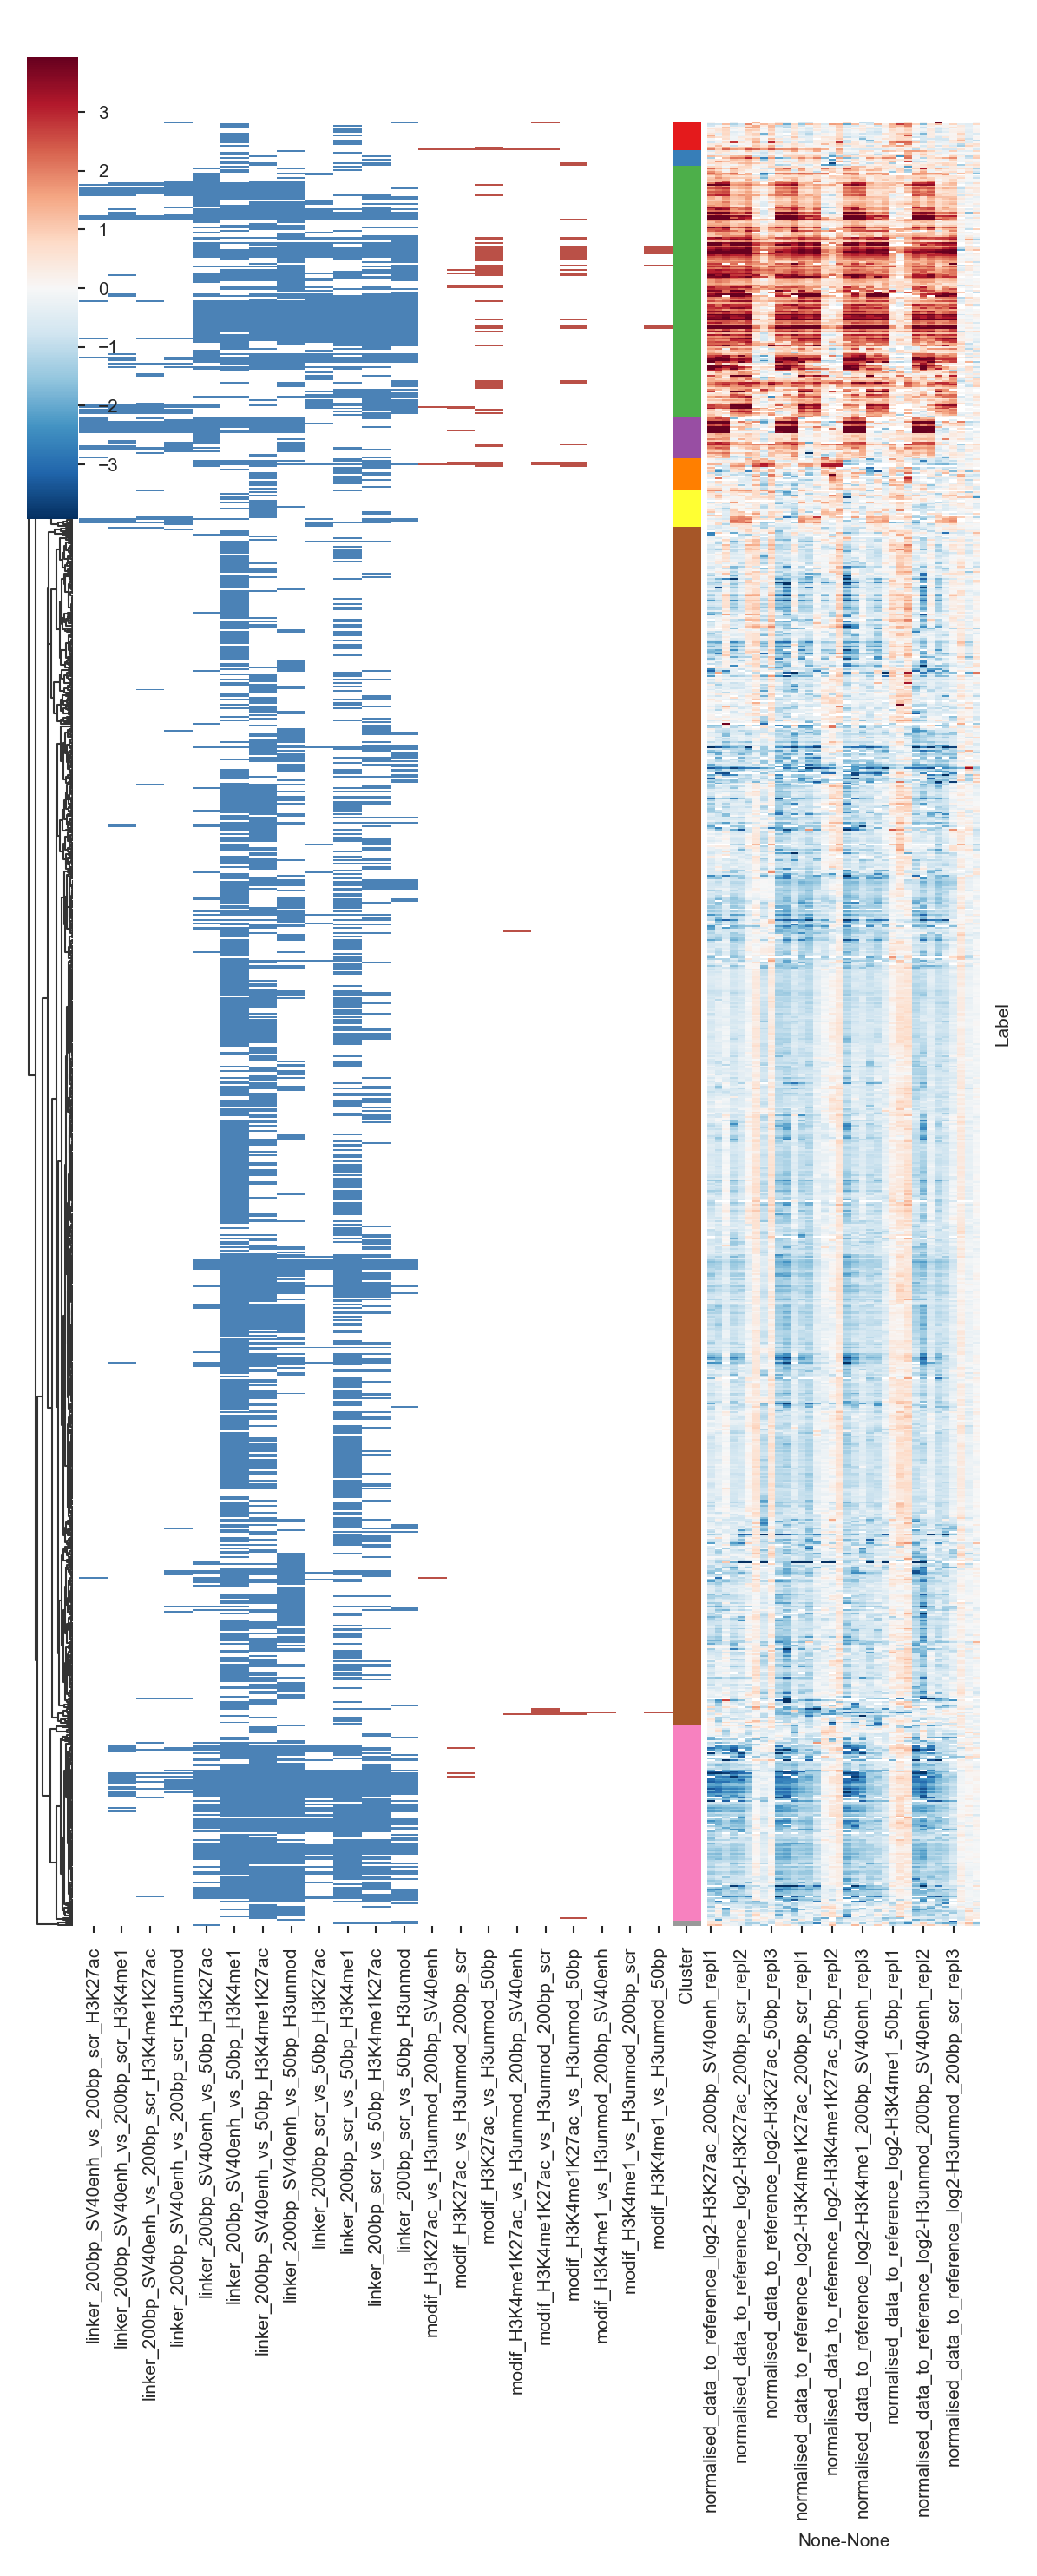

In [49]:

sns.clustermap(matrix_for_clustering, 
               mask=matrix_for_clustering_mask,
               row_linkage=linkage_rows,
               col_cluster=False,
               row_colors=row_colors, 
               yticklabels=False, 
               cmap='RdBu_r', 
               center=0,
               dendrogram_ratio=0.05,
               vmin=-cluster_vmin_vmax,
               vmax=+cluster_vmin_vmax,
               figsize=(FIVE_MM_IN_INCH*20, FIVE_MM_IN_INCH*50)
)

And now, prettier, stylised heatmaps

In [50]:
from seaborn.matrix import ClusterGrid
row_colors.values[linkage_rows_ind]

array([['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#e41a1c'],
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#e41a1c'],
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#e41a1c'],
       ...,
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#999999'],
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#999999'],
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#999999']], dtype=object)



Heatmap of protein responses to the long-linkers-enh experiments.
Proteins are plotted in rows, experiments in columns.
Heatmap on the left colour codes proteins that respond to
either linkers (blue) or modifications (red) in each of the experiments.
Only proteins that respond to any linker or modification are shown.

Clustering (ward) dendrograms are shown on the left or the bottom.
Colour scale represents log2 fold change normalised to mean control experiment.




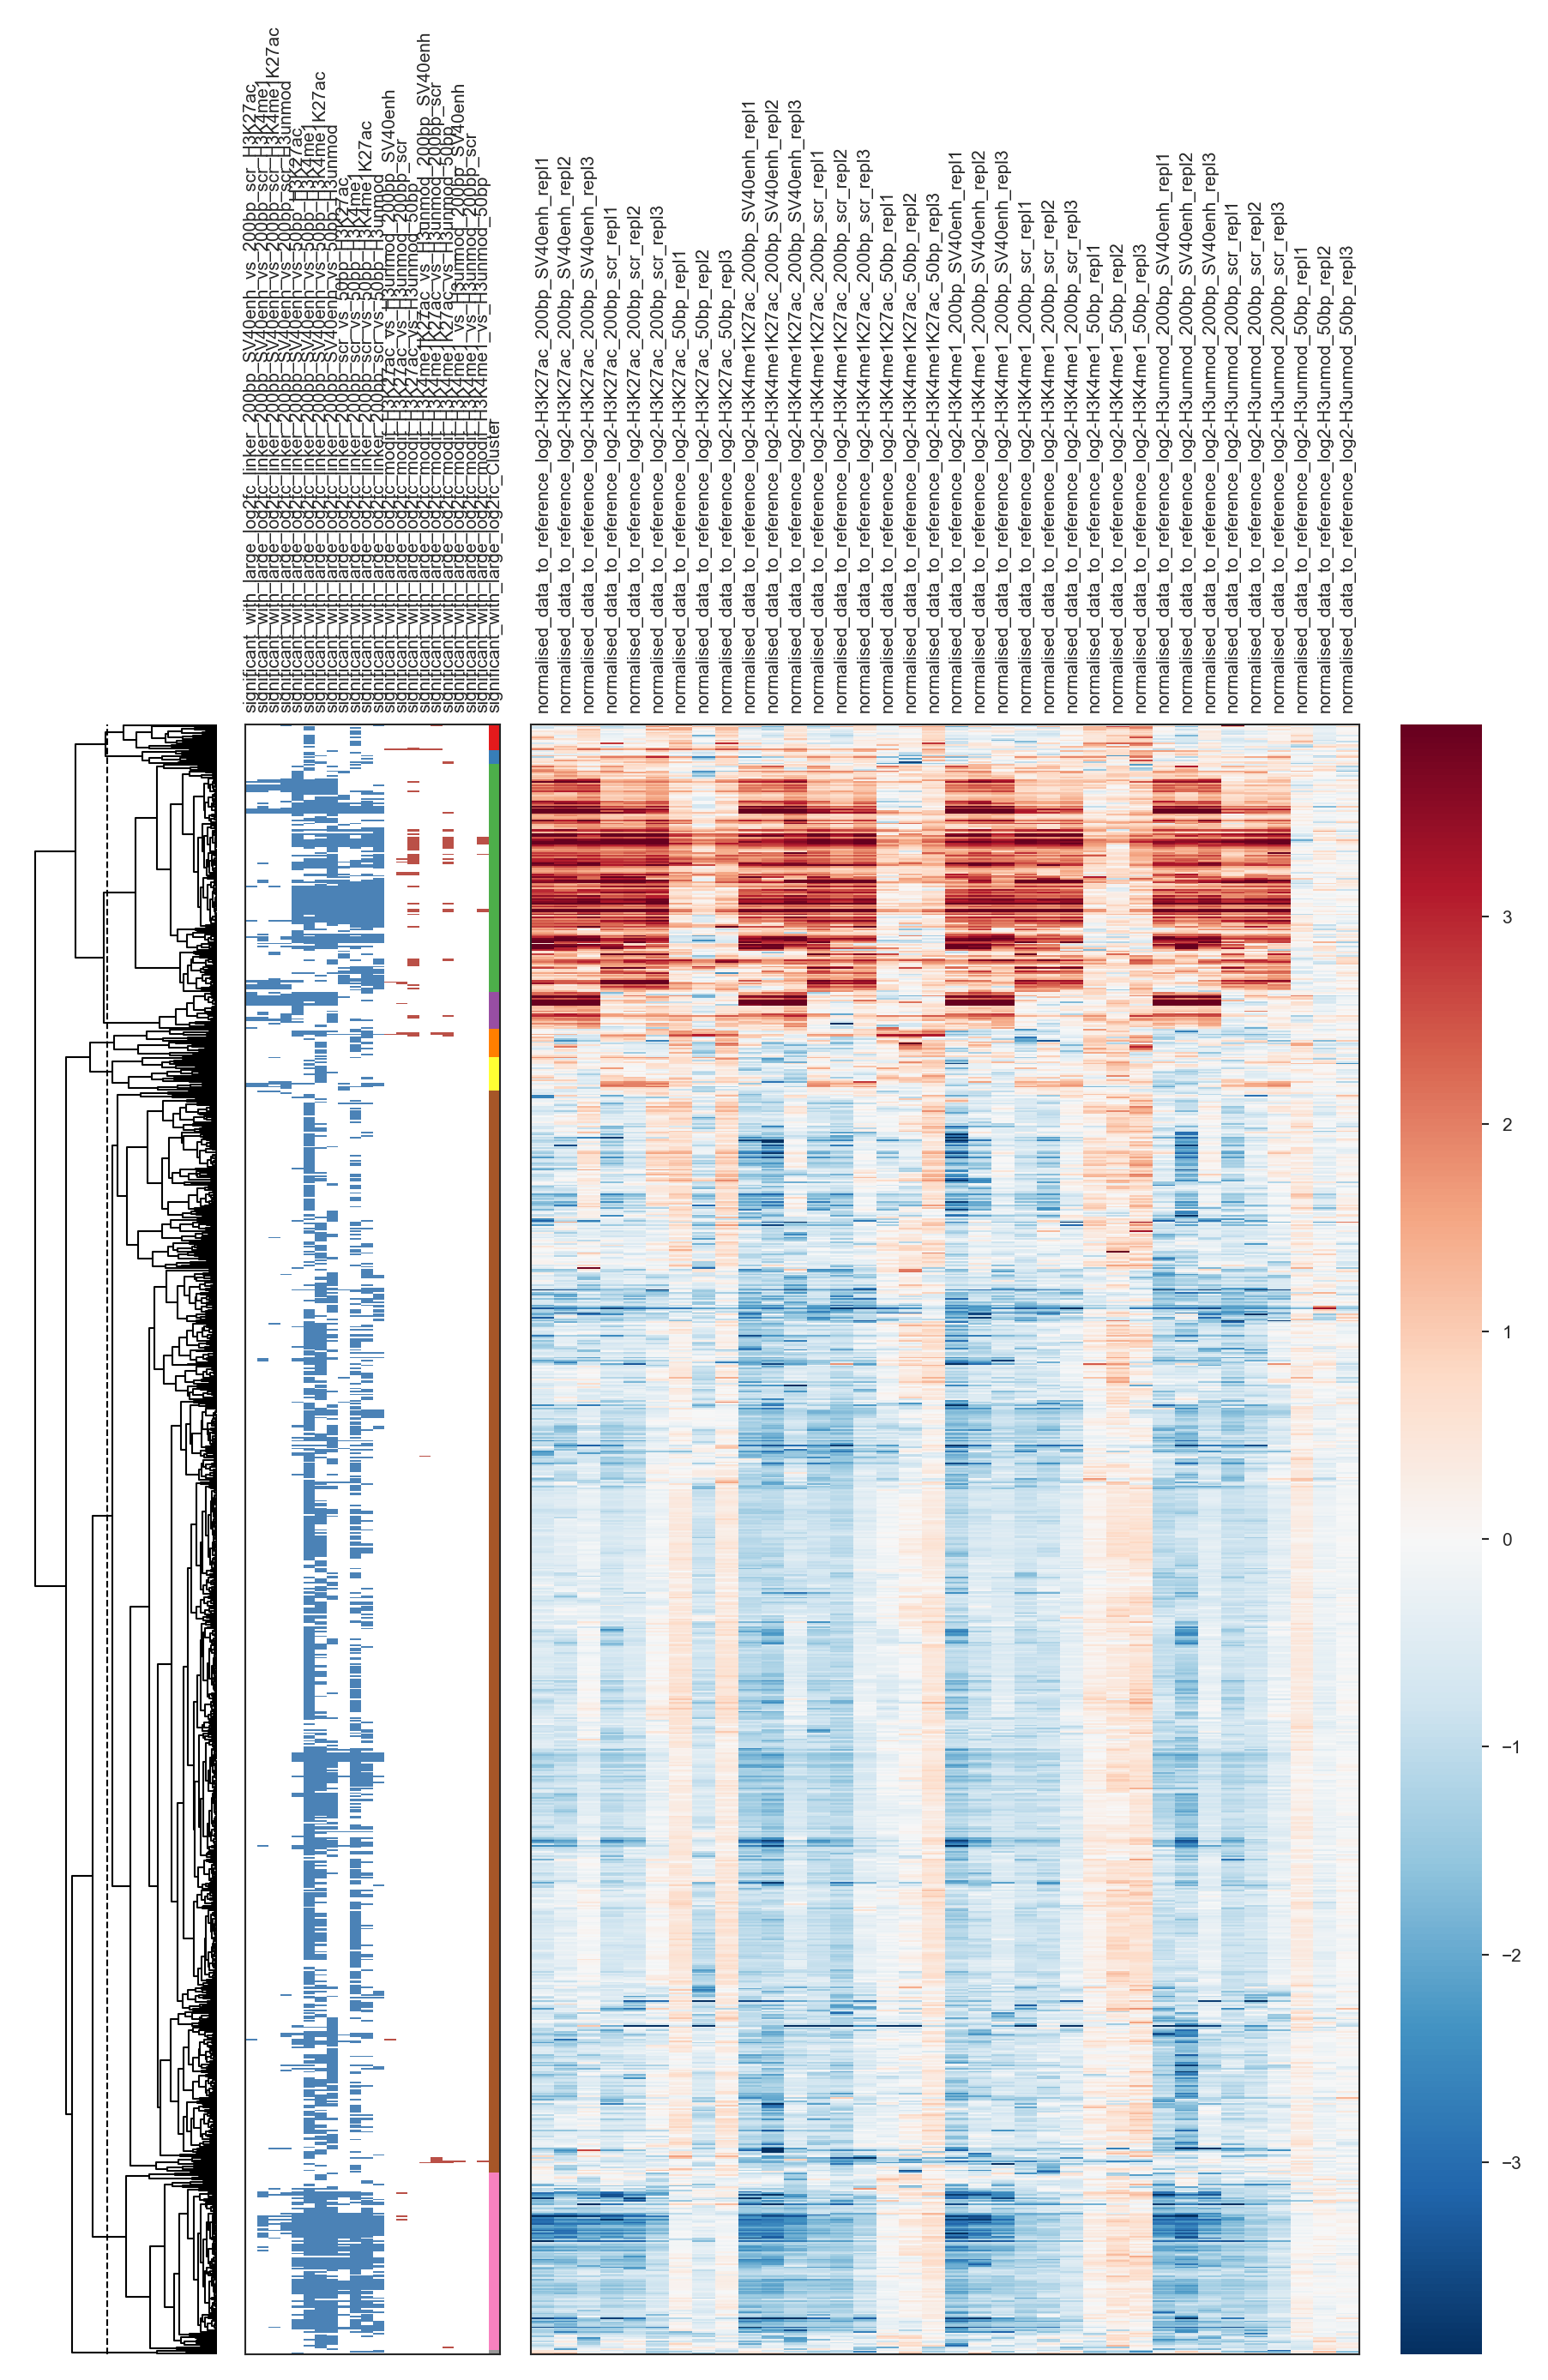

In [51]:
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(30*FIVE_MM_IN_INCH, 50*FIVE_MM_IN_INCH), constrained_layout=True)

gs = GridSpec(2, 3, 
              height_ratios=[0.9, 0.1], 
              width_ratios=[0.15, 0.2, 0.65],
              figure=fig,
              wspace=0.01,
              hspace=0.01,
             )


ax_heatmap = fig.add_subplot(gs[0, 2])
ax_colors_row = fig.add_subplot(gs[0, 1])
ax_dendrogram_row = fig.add_subplot(gs[0, 0])

sns.heatmap(
    matrix_for_clustering.loc[linkage_rows_order],
    cmap='RdBu_r',
    vmin=-cluster_vmin_vmax,
    vmax=cluster_vmin_vmax,
    ax=ax_heatmap,
    xticklabels=1,
    rasterized=True
)

hierarchy.dendrogram(linkage_rows, 
                     ax=ax_dendrogram_row, 
                     link_color_func=lambda x: 'black',
                     orientation='left',
                    )

ax_dendrogram_row.axvline(THRESHOLD, linestyle='--', color='k')

# sns.heatmap inverst axis, we should as well
ax_dendrogram_row.invert_yaxis()

row_color_matrix, row_color_cmap = ClusterGrid.color_list_to_matrix_and_cmap(
    row_colors.values.T, 
    linkage_rows_ind
)
sns.heatmap(row_color_matrix, ax=ax_colors_row, cmap=row_color_cmap, cbar=False, 
            xticklabels=[f'{SIGNIFICANT_COL}_{c}' for c in row_colors.columns], yticklabels=0)

for ax in [ax_heatmap, ax_colors_row]:
    ax.grid(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(True)
    ax.set_yticks([])
    ax.xaxis.tick_top()
    ax.xaxis.set_tick_params(length=0, rotation=90)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
for ax in [ax_dendrogram_row]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

_fname = OUTPUT_DIRECTORY / f'02-heatmap-{DATASET}.pdf'
_caption = f"""

Heatmap of protein responses to the {DATASET} experiments.
Proteins are plotted in rows, experiments in columns.
Heatmap on the left colour codes proteins that respond to
either linkers (blue) or modifications (red) in each of the experiments.
Only proteins that respond to any linker or modification are shown.

Clustering (ward) dendrograms are shown on the left or the bottom.
Colour scale represents log2 fold change normalised to mean control experiment.

"""
plt.savefig(_fname, bbox_inches='tight', dpi=DPI)
with open(str(_fname) + '.caption.md', 'w') as f:
    f.write(_caption)
    print(_caption)


    

In [52]:
excel_cluster = pd.DataFrame(cluster.copy())
excel_cluster.columns = pd.MultiIndex.from_tuples([('cluster_classification', 'cluster')])
excel_cluster

,cluster_classification
,cluster
Label,
MYH9,Cluster 7
SPTAN1,Not clustered
PRKDC,Cluster 7
ACTB,Cluster 7
SPTBN1,Not clustered
...,...
NFKBIL1,Cluster 7
NOS1AP,Not clustered


In [53]:
cluster.value_counts()

Cluster 7            703
Not clustered        559
Cluster 3            148
Cluster 8            115
Cluster 4             24
Cluster 6             22
Cluster 5             18
Cluster 1             17
Insufficient data     12
Cluster 2              9
Cluster 9              3
Name: Cluster, dtype: int64

## Writing Excel

In [54]:
import xlsxwriter
from seaborn.utils import relative_luminance

Collect everything in one place

In [55]:
excel_model_outputs_classification

model_classification                  
            modif_responsive linker_responsive
Label                                         
MYH9                   False              True
SPTAN1                 False             False
PRKDC                  False              True
ACTB                   False              True
SPTBN1                 False             False
...                      ...               ...
NFKBIL1                False              True
NOS1AP                 False             False
MBOAT7                 False              True
KANK2                  False             False
ASPM                   False             False

[1630 rows x 2 columns]

In [56]:
cluster

Label
MYH9           Cluster 7
SPTAN1     Not clustered
PRKDC          Cluster 7
ACTB           Cluster 7
SPTBN1     Not clustered
               ...      
NFKBIL1        Cluster 7
NOS1AP     Not clustered
MBOAT7         Cluster 7
KANK2      Not clustered
ASPM       Not clustered
Name: Cluster, Length: 1630, dtype: object

In [57]:
df_excel = excel_metadata.join(excel_cluster).join(excel_model_outputs_classification).join(excel_model_outputs_fc_estimates).join(excel_model_comment).join(excel_model_outputs_other).join(excel_model_coefficients).join(excel_normalised_data_reference).join(excel_normalised_data).join(excel_raw_data)
assert not df_excel.index.duplicated().any()
df_excel

metadata                     \
           Label Accession     Gene   
Label                                 
MYH9        MYH9    P35579     MYH9   
SPTAN1    SPTAN1    Q13813   SPTAN1   
PRKDC      PRKDC    P78527    PRKDC   
ACTB        ACTB    P60709     ACTB   
SPTBN1    SPTBN1    Q01082   SPTBN1   
...          ...       ...      ...   
NFKBIL1  NFKBIL1    Q9UBC1  NFKBIL1   
NOS1AP    NOS1AP    O75052   NOS1AP   
MBOAT7    MBOAT7    Q96N66   MBOAT7   
KANK2      KANK2    Q63ZY3    KANK2   
ASPM        ASPM    Q8IZT6     ASPM   

                                                                         \
                                               Description # AAs # PSMs   
Label                                                                     
MYH9     Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...  1960  20013   
SPTAN1   Spectrin alpha chain, non-erythrocytic 1 OS=Ho...  2472  11500   
PRKDC    DNA-dependent protein kinase catalytic subunit...  4128  12445   
ACTB     Actin, cytoplasmic 1 OS=Homo sapiens OX=9606 G...   375  10826   
SPTBN1   Spectrin beta chain, non-erythrocytic 1 OS=Hom...  2364  10348   
...                                                    ...   ...    ...   
NFKBIL1  NF-kappa-B inhibitor-like protein 1 OS=Homo sa...   381      3   
NOS1AP   Carboxyl-terminal PDZ ligand of neuronal nitri...   506      3   
MBOAT7   Lysophospholipid acyltransferase 7 OS=Homo sap...   472      2   
KANK2    KN motif and ankyrin repeat domain-containing ...   851      2   
ASPM     Abnormal spindle-like microcephaly-associated ...  3477      2   

                                                                            \
        # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                        
MYH9           170                                   170               137   
SPTAN1         205                                   205               204   
PRKDC          246                                   246               246   
ACTB            30                                    30                13   
SPTBN1         180                                   180               166   
...            ...                                   ...               ...   
NFKBIL1          2                                     2                 2   
NOS1AP           2                                     2                 2   
MBOAT7           2                                     2                 2   
KANK2            2                                     2                 2   
ASPM             2                                     2                 2   

                      ...           raw_data                              \
        Coverage [%]  ... H3K4me1_50bp_repl3 H3unmod_200bp_SV40enh_repl1   
Label                 ...                                                  
MYH9              71  ...       1.377992e+09                1.541227e+09   
SPTAN1            79  ...       7.037297e+08                7.093685e+08   
PRKDC             64  ...       6.041735e+08                8.357701e+08   
ACTB              82  ...       1.732659e+10                1.532196e+10   
SPTBN1            79  ...       6.267472e+08                5.858394e+08   
...              ...  ...                ...                         ...   
NFKBIL1            7  ...       1.888303e+06                8.530328e+05   
NOS1AP             5  ...       9.545261e+05                7.520877e+05   
MBOAT7             6  ...       1.704048e+06                         NaN   
KANK2              3  ...                NaN                         NaN   
ASPM               1  ...       5.646916e+05                         NaN   

                                                                 \
        H3unmod_200bp_SV40enh_repl2 H3unmod_200bp_SV40enh_repl3   
Label                                                             
MYH9                   9.170311e+08                

Reorder the data as follows:

- Order clustered proteins by cluster order.
- Place insufficient data proteins after the cluster, ordered by P-value
- Place other proteins after these, ordered by P-value

In [58]:
_order = excel_model_outputs_other.loc(axis=1)[:,'P.Value'].min(axis=1).sort_values().index

excel_order = list(linkage_rows_order)
excel_order += [o for o in _order if cluster.get(o) == 'Insufficient data']
excel_order += [o for o in _order if cluster.get(o) == 'Not clustered']

assert set(excel_order) == set(data_metadata.index)

df_excel = df_excel.loc[excel_order]
df_excel

metadata                      \
             Label Accession      Gene   
Label                                    
EIF2S2      EIF2S2    P20042    EIF2S2   
FIP1L1      FIP1L1    Q6UN15    FIP1L1   
FLOT2        FLOT2    Q14254     FLOT2   
IRX4          IRX4    P78413      IRX4   
RRP8          RRP8    O43159      RRP8   
...            ...       ...       ...   
SERPINB3  SERPINB3    P29508  SERPINB3   
S100A14    S100A14    Q9HCY8   S100A14   
SEMG1        SEMG1    P04279     SEMG1   
POLE3        POLE3    Q9NRF9     POLE3   
KANK2        KANK2    Q63ZY3     KANK2   

                                                                          \
                                                Description # AAs # PSMs   
Label                                                                      
EIF2S2    Eukaryotic translation initiation factor 2 sub...   333      3   
FIP1L1    Pre-mRNA 3'-end-processing factor FIP1 OS=Homo...   594     90   
FLOT2     Flotillin-2 OS=Homo sapiens OX=9606 GN=FLOT2 P...   428    540   
IRX4      Iroquois-class homeodomain protein IRX-4 OS=Ho...   519     42   
RRP8      Ribosomal RNA-processing protein 8 OS=Homo sap...   456    264   
...                                                     ...   ...    ...   
SERPINB3  Serpin B3 OS=Homo sapiens OX=9606 GN=SERPINB3 ...   390      6   
S100A14   Protein S100-A14 OS=Homo sapiens OX=9606 GN=S1...   104      2   
SEMG1     Semenogelin-1 OS=Homo sapiens OX=9606 GN=SEMG1...   462      2   
POLE3     DNA polymerase epsilon subunit 3 OS=Homo sapie...   147      2   
KANK2     KN motif and ankyrin repeat domain-containing ...   851      2   

                                                                             \
         # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                         
EIF2S2            3                                     3                 3   
FIP1L1            9                                     9                 9   
FLOT2            23                                    23                23   
IRX4              8                                     8                 8   
RRP8             16                                    16                16   
...             ...                                   ...               ...   
SERPINB3          6                                     6                 2   
S100A14           2                                     2                 2   
SEMG1             2                                     2                 2   
POLE3             2                                     2                 2   
KANK2             2                                     2                 2   

                       ...           raw_data                              \
         Coverage [%]  ... H3K4me1_50bp_repl3 H3unmod_200bp_SV40enh_repl1   
Label                  ...                                                  
EIF2S2              9  ...       3.111675e+05                         NaN   
FIP1L1             25  ...       3.742884e+07                3.844093e+07   
FLOT2              61  ...       1.216718e+08                7.474393e+07   
IRX4               26  ...       5.697379e+06                5.833794e+06   
RRP8               48  ...       4.645764e+07                7.047937e+07   
...               ...  ...                ...                         ...   
SERPINB3           18  ...                NaN                         NaN   
S100A14            25  ...                NaN                         NaN   
SEMG1               7  ...                NaN                         NaN   
POLE3              30  ...                NaN                         NaN   
KANK2               3  ...                NaN                         NaN   

                                                                  \
         H3unmod_200bp_SV40enh_repl2 H3unmod_200bp_SV40enh_repl3   
Label                             

In [59]:
from seaborn.utils import relative_luminance

In [60]:
output_xlsx = OUTPUT_DIRECTORY / f'01-model-results.{DATASET}.xlsx'
output_csv = OUTPUT_DIRECTORY / f'01-model-results.{DATASET}.csv.gz'

COLUMN_GROUPS = {
    'Metadata': excel_metadata.columns,
    'Classification': excel_model_outputs_classification.columns,
    'Log2(FC) estimates (incl. imputed)': list(excel_model_outputs_fc_estimates.columns),
    'Comment': list(excel_model_comment.columns),
}

GROUP_DEPTHS = {
    # 'Comment': 2, # Merging the two rows for the comment group makes excel file not sortable
}

for coef in MODEL_COEFS:
    COLUMN_GROUPS[f'Model outputs for {coef}'] = list(excel_model_outputs_other[[f'model_estimates_for_{coef}']].columns)

COLUMN_GROUPS = {
    **COLUMN_GROUPS,
    'Classification': list(excel_cluster) + list(excel_model_outputs_classification),
    'Model coefficient estimates': list(excel_model_coefficients),
    'Normalised data (to reference, log2)': list(excel_normalised_data_reference),
    'Normalised data (log2)': list(excel_normalised_data),
    'Raw data': list(excel_raw_data),
}

RENAMES = {}

for col in excel_model_outputs_fc_estimates.columns:
    RENAMES[col] = col[0].partition('model_estimates_for_')[2]
    
_simple_renames = []
_simple_renames.extend(excel_cluster.columns)
_simple_renames.extend(excel_model_outputs_classification.columns)
_simple_renames.extend(excel_metadata.columns)
_simple_renames.extend(excel_model_outputs_other.columns)
_simple_renames.extend(excel_model_coefficients.columns)
_simple_renames.extend(excel_normalised_data_reference.columns)
_simple_renames.extend(excel_normalised_data.columns)
_simple_renames.extend(excel_raw_data.columns)
_simple_renames.extend(excel_model_comment.columns)

for col in _simple_renames:
    RENAMES[col] = col[1]
    

writer = pd.ExcelWriter(output_xlsx, engine='xlsxwriter')
workbook = writer.book

bold = workbook.add_format({'bold': True})
bold_right = workbook.add_format({'bold': True, 'right': 1})

bold_rotated = workbook.add_format({'bold': True, 'rotation':90})
bold_rotated_right = workbook.add_format({'bold': True, 'rotation':90, 'right': 1})

merged_format = workbook.add_format({
    'bold': 1,
    'align': 'center',
    'valign': 'vcenter',
    'right': 1,
    'text_wrap': True,
})

right_border = workbook.add_format({
    'right': 1,
})

sheet_name = f"Summary"

first_data_row = 2
first_data_col = 0

# pandas does not support writing to Excel with multi-index and header=False
# so quickly remove the index, from the DF we're writing
# (it won't make a difference as we will handle header columns ourselves)
_df_excel_nomultiindex = df_excel.copy()
_df_excel_nomultiindex.columns = ['___'.join(map(str, c)) for c in df_excel.columns]
# Write this df as csv:
_df_excel_nomultiindex.to_csv(output_csv)
# And into excel
_df_excel_nomultiindex.to_excel(
    writer, 
    sheet_name=sheet_name, 
    startrow=first_data_row, 
    startcol=first_data_col, 
    index=False, 
    header=False
)

last_data_row = first_data_row + len(df_excel)
last_data_col = first_data_col + len(df_excel.columns)

worksheet = writer.sheets[sheet_name]

SEPARATOR_COLUMNS = {v[-1] for v in COLUMN_GROUPS.values()}

colname_to_index_map = {}
for i, col in enumerate(df_excel.columns, start=first_data_col):
    fmt_ = bold_rotated if not col in SEPARATOR_COLUMNS else bold_rotated_right
    
    worksheet.write(first_data_row-1, i, RENAMES.get(col, str(col)), fmt_)
    colname_to_index_map[col] = i

for merged_name, col_list in COLUMN_GROUPS.items():
    _first = colname_to_index_map[col_list[0]]
    _last = colname_to_index_map[col_list[-1]]
    
    rows_to_merge = GROUP_DEPTHS.get(merged_name, 1)
    
    if _first == _last and rows_to_merge == 1:
        # Cannot merge one column only
        worksheet.write(first_data_row-2, _first, merged_name, merged_format)
    else:
        worksheet.merge_range(
            first_data_row-2, colname_to_index_map[col_list[0]], 
            first_data_row-2+(rows_to_merge-1), colname_to_index_map[col_list[-1]],
            merged_name,
            merged_format
        )
        
for col in SEPARATOR_COLUMNS:
    worksheet.set_column(colname_to_index_map[col], colname_to_index_map[col], cell_format=right_border)

color_red = '#b2182b'
format_red = workbook.add_format({'bg_color': color_red})
color_red_lighter = '#f4a582'

color_white = '#f7f7f7'

color_blue = '#2166ac'
format_blue = workbook.add_format({'bg_color': color_blue})
color_blue_lighter = '#92c5de'
       
    
three_color_columns = list(COLUMN_GROUPS['Log2(FC) estimates (incl. imputed)'])
three_color_columns += [c for c in excel_model_outputs_other.columns if c[1] == 'logFC']

for col in three_color_columns:
    
    _limit = df_excel[col].abs().replace(np.inf, np.nan).quantile(0.98)
    print(f"Excel formatting limit for {col}: +/-{_limit}")
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': '3_color_scale',
            'min_type': 'num',
            'max_type': 'num',
            'mid_type': 'num',
            'min_value': -_limit,
            'max_value': _limit,
            'mid_value': 0,
            'max_color': color_red,
            'mid_color': color_white,
            'min_color': color_blue,

        }
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"inf"',
        'format': format_red}
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"-inf"',
        'format': format_blue}
    )
    
# Also use 3-colours for reference-normalised data but have joint limits

_limit_ref_norm = cluster_vmin_vmax

for col in excel_normalised_data_reference.columns:
    _limit = _limit_ref_norm
    print(f"Excel formatting limit for {col}: +/-{_limit}")

    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': '3_color_scale',
            'min_type': 'num',
            'max_type': 'num',
            'mid_type': 'num',
            'min_value': -_limit,
            'max_value': _limit,
            'mid_value': 0,
            'max_color': color_red,
            'mid_color': color_white,
            'min_color': color_blue,

        }
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"inf"',
        'format': format_red}
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"-inf"',
        'format': format_blue}
    )
    
databar_columns = list(COLUMN_GROUPS['Model coefficient estimates']) + list(excel_normalised_data.columns) + list(excel_raw_data.columns) 

for col in databar_columns:
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': 'data_bar',
            'min_type': 'percentile',
            'max_type': 'percentile',
            'min_value': 1,
            'max_value': 99,

        }
    )
    

boolean_columns_good = [c for c in excel_model_outputs_other.columns if c[1] in ['significant', 'significant_with_large_log2fc']]
boolean_columns_good += list(excel_model_outputs_classification.columns)

boolean_columns_bad = [c for c in excel_model_outputs_other.columns if c[1] in ['logFC_is_imputed', 'logFC_based_on_single_datapoint']]

bold_green = workbook.add_format({'bold': True, 'font_color': '#1b7837'})
bold_red = workbook.add_format({'bold': True, 'font_color': color_red})
for col in boolean_columns_good:
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': 'TRUE',
        'format': bold_green}
    )

for col in boolean_columns_bad:
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': 'TRUE',
        'format': bold_red}
    )
    
for col in excel_cluster.columns:
    
    for _clust, _color in cluster_palette.items():
        
        lum = relative_luminance(_color)
        text_color = "#000000" if lum > .408 else "#FFFFFF"
        fmt = workbook.add_format({'bold': True, 'bg_color': _color, 'font_color': text_color})
        
        worksheet.conditional_format(
            first_data_row, colname_to_index_map[col], 
            last_data_row, colname_to_index_map[col], 
            {'type': 'cell',
            'criteria': '==',
            'value': f'"{_clust}"',
            'format': fmt}
        )
    fmt = workbook.add_format({'bold': True, 'font_color': '#FF0000'})
        
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"Insufficient data"',
        'format': fmt}
    )  
    

# Narrow columns
narrow_columns = []
narrow_columns.extend([c for c in data_metadata if c[1] in ['# PSMs', '# Peptides', '# Unique Peptides', 'Coverage [%]']])
    
for col in narrow_columns:
    worksheet.set_column(colname_to_index_map[col], colname_to_index_map[col], 4)

worksheet.set_column(colname_to_index_map[('metadata', 'Description')], colname_to_index_map[('metadata', 'Description')], 40)
worksheet.set_column(colname_to_index_map[('model_estimates', 'comment')], colname_to_index_map[('model_estimates', 'comment')], 40)

worksheet.freeze_panes(first_data_row, colname_to_index_map[('metadata', 'Description')] + 1)
worksheet.autofilter(first_data_row-1, first_data_col, last_data_row, last_data_col)
      
writer.save()
print("Done!")

Excel formatting limit for ('model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3K27ac', 'logFC_imputed'): +/-1.9349234551469388
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3K4me1', 'logFC_imputed'): +/-2.167888193669913
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3K4me1K27ac', 'logFC_imputed'): +/-2.045463712021617
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40enh_vs_200bp_scr_H3unmod', 'logFC_imputed'): +/-2.0176699153521223
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40enh_vs_50bp_H3K27ac', 'logFC_imputed'): +/-3.037229062738448
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40enh_vs_50bp_H3K4me1', 'logFC_imputed'): +/-3.4201189442157154
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40enh_vs_50bp_H3K4me1K27ac', 'logFC_imputed'): +/-3.195145415216708
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40enh_vs_50bp_